# nCov - A Geo Statistical Analysis

**Saurav Mishra**

# What is Coronavirus?

    Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe 
    diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). 
    A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans.  

    Coronaviruses are zoonotic, meaning they are transmitted between animals and people.  Detailed investigations found 
    that SARS-CoV was transmitted from civet cats to humans and MERS-CoV from dromedary camels to humans. Several 
    known coronaviruses are circulating in animals that have not yet infected humans. 

    Common signs of infection include respiratory symptoms, fever, cough, shortness of breath and breathing difficulties.
    In more severe cases, infection can cause pneumonia, severe acute respiratory syndrome, kidney failure and even death. 

    Standard recommendations to prevent infection spread include regular hand washing, covering mouth and nose when coughing
    and sneezing, thoroughly cooking meat and eggs. Avoid close contact with anyone showing symptoms of respiratory illness
    such as coughing and sneezing.
    
    
    The World Health Organization has declared the novel coronavirus outbreak a public health emergency, it has increased 
    the general fear among the public. A lot of countires have heightened their measures to fight with this virus with the 
    condition in China still senitive..More than 20 countries and territories outside of mainland China have confirmed cases 
    of the virus -- spanning Asia, Europe, North America and the Middle East -- as India, Italy and the Philippines reported 
    their first cases.

Source - 

https://www.who.int/health-topics/coronavirus

https://www.worldometers.info/coronavirus/

https://www.livescience.com/new-coronavirus-images.html


## Let's do an Exploratory analysis on the data we have so far. 

   The data has been shared in kaggle @ https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset.
   
   Real time data on everyday basis is also made available by the Johns Hopkins university @ https://docs.google.com/spreadsheets/d/1yZv9w9zRKwrGTaR-YzmAqMefw4wMlaXocejdxZaTs6w/htmlview?usp=sharing&sle=true#
   

In [1]:
# import the necessary libraries

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
import pycountry
import folium 
from folium import plugins




%config InlineBackend.figure_format = 'retina'
py.init_notebook_mode(connected=True)


# Utility Functions

'''Display markdown formatted output like bold, italic bold etc.'''
def formatted_text(string):
    display(Markdown(string))

In [2]:
# Import the data
nCoV_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv")

# Data Glimpse
nCoV_data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [3]:
# Data Info
nCoV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
Sno               1719 non-null int64
Date              1719 non-null object
Province/State    1257 non-null object
Country           1719 non-null object
Last Update       1719 non-null object
Confirmed         1719 non-null float64
Deaths            1719 non-null float64
Recovered         1719 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 107.6+ KB


    - We would not need the Sno column for analysis. Lets drop the column.
    
    - Also the 'Last Update' column contains date but is of type object. Lets convert the same to date type so that is 
      can be used in a better way.
      
    - The 'Province/State' column has 487 non-null values. This means there are some missing values. We could fill in these
      misssing values with the corresponding 'Country' name.

In [4]:
# Convert 'Last Update' column to datetime object
nCoV_data['Last Update'] = nCoV_data['Last Update'].apply(pd.to_datetime)
nCoV_data['Date'] = nCoV_data['Date'].apply(pd.to_datetime)

# Also drop the 'Sno' and the 'Date' columns
nCoV_data.drop(['Sno'], axis=1, inplace=True)

# Fill the missing values in 'Province/State' with the 'Country' name.
nCoV_data['Province/State'] = nCoV_data['Province/State'].replace(np.nan, nCoV_data['Country'])

# Data Glimpse
nCoV_data.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [5]:
# Check the Data Info again
nCoV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 7 columns):
Date              1719 non-null datetime64[ns]
Province/State    1719 non-null object
Country           1719 non-null object
Last Update       1719 non-null datetime64[ns]
Confirmed         1719 non-null float64
Deaths            1719 non-null float64
Recovered         1719 non-null float64
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 94.1+ KB


In [6]:
# Lets rename the columns - 'Province/State' and 'Last Update' to remove the '/' and space respectively.
nCoV_data.rename(columns={'Last Update': 'LastUpdate', 'Province/State': 'State'}, inplace=True)

# Data Glimpse
nCoV_data.head()

,Date,State,Country,LastUpdate,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [7]:
# Lets check the total #Countries affected by nCoV

nCoV_Countries = nCoV_data['Country'].unique().tolist()
print('\n')
print(nCoV_Countries)
print("\n------------------------------------------------------------------")
print("\nTotal countries affected by nCoV: ",len(nCoV_Countries))



['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others', 'Egypt']

------------------------------------------------------------------

Total countries affected by nCoV:  34


    - We see that there are total of 31 countries. Out of these 'China' and 'Mainland China' can be clubbed.

In [8]:
# Convert 'Mainland China' to 'China'
nCoV_data['Country'] = np.where(nCoV_data['Country'] == 'Mainland China', 'China', nCoV_data['Country'])

# Check the # countries again
nCoV_Countries = nCoV_data['Country'].unique().tolist()
print('\n')
print(nCoV_Countries)
print("\n------------------------------------------------------------------")
print("\nTotal countries affected by nCoV: ",len(nCoV_Countries))



['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others', 'Egypt']

------------------------------------------------------------------

Total countries affected by nCoV:  33


**Now as this data is getting updated multiple time every day and the dataset contains multiple entries for each country as a continuous series data we would only be intrested in the latest data for each country. We will create a new subset of the master data with the latest information.**

**But before doing that les us extract the day and the time - 'hour' from the master data and create new columns - day and hour**

In [9]:
nCoV_data['Day'] = nCoV_data['LastUpdate'].apply(lambda x:x.day)
nCoV_data['Hour'] = nCoV_data['LastUpdate'].apply(lambda x:x.hour)

# Data Glimpse
nCoV_data.head()

,Date,State,Country,LastUpdate,Confirmed,Deaths,Recovered,Day,Hour
0,2020-01-22 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0,22,12
1,2020-01-22 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0,22,12
2,2020-01-22 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0,22,12
3,2020-01-22 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0,22,12
4,2020-01-22 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0,22,12


# Statistical Analysis

### Distribution of Confirmed, Deaths, Recovered cases on every day basis starting from 22nd Jan 2019

***Confirmed Cases vs Day***

Text(0.5, 1.0, 'Distribution of total confirmed cases on every day basis starting from 22nd Jan')

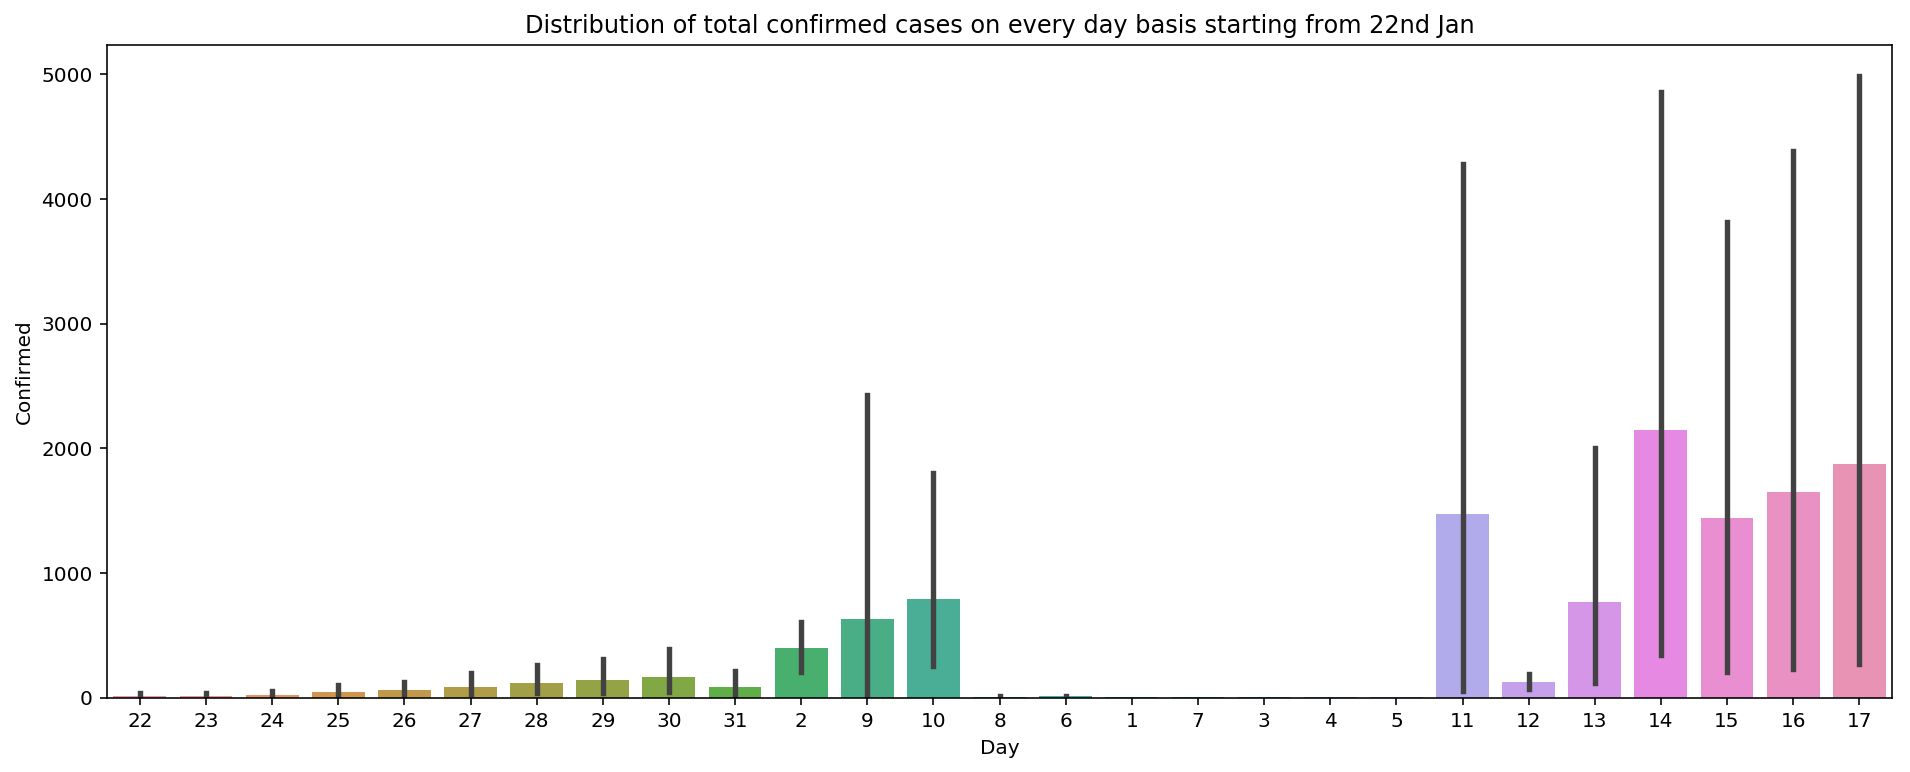

In [10]:
formatted_text('***Confirmed Cases vs Day***')
plt.figure(figsize=(16,6))
sns.barplot(x='Day',y='Confirmed',data=nCoV_data, order=nCoV_data.Day.unique().tolist())
plt.title('Distribution of total confirmed cases on every day basis starting from 22nd Jan')

***Death Toll vs Day***

Text(0.5, 1.0, 'Distribution of total death toll on every day basis starting from 22nd Jan')

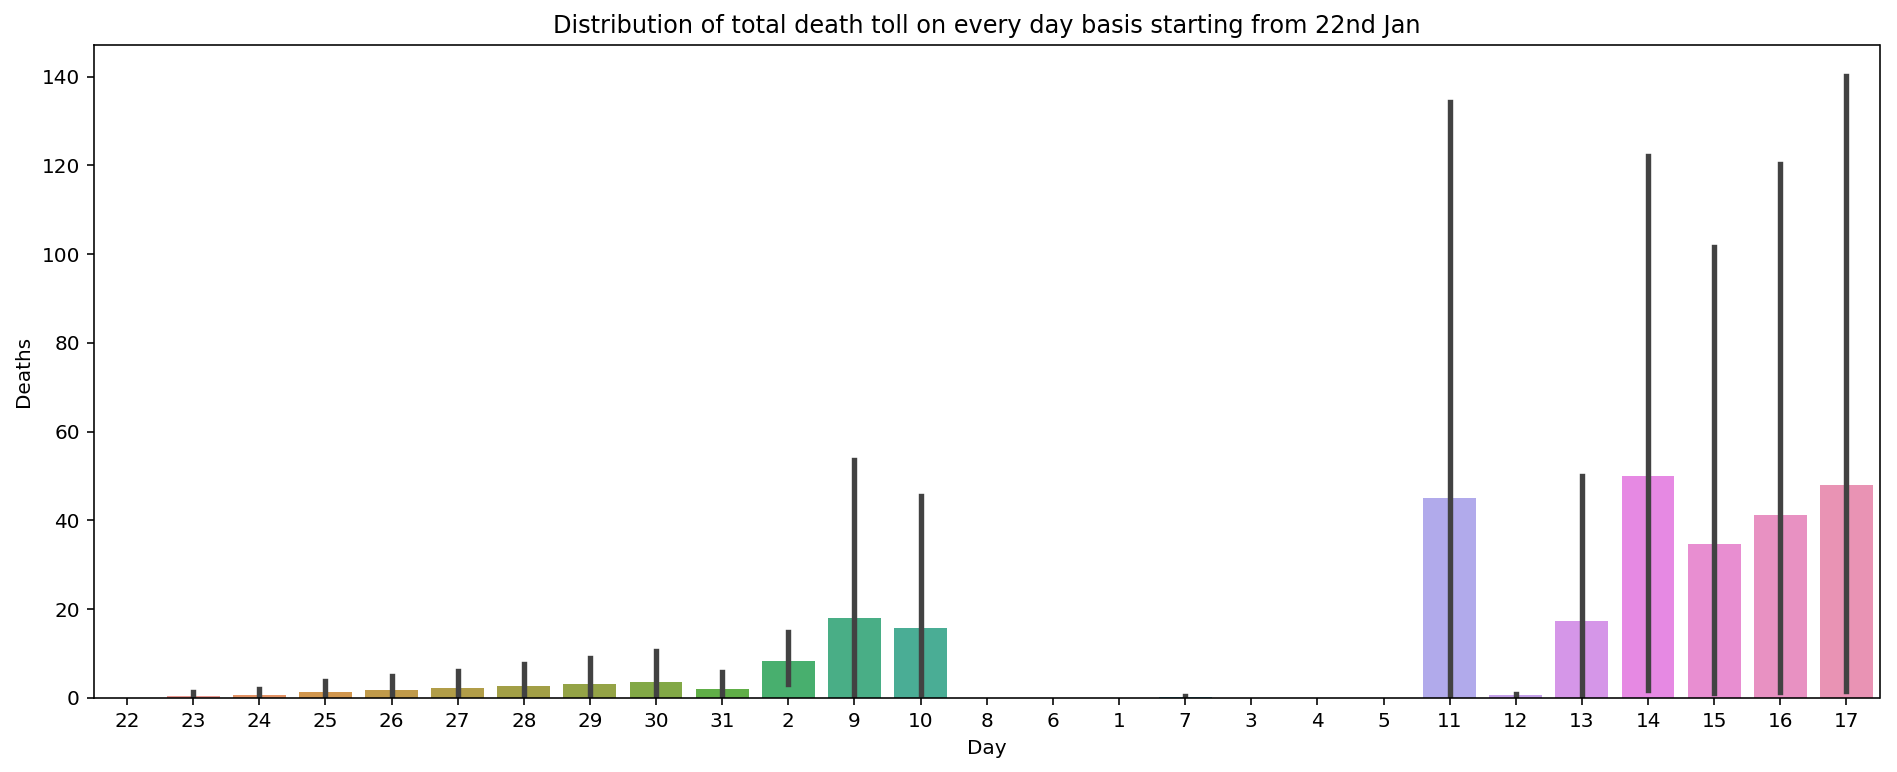

In [11]:
formatted_text('***Death Toll vs Day***')
plt.figure(figsize=(16,6))
sns.barplot(x='Day',y='Deaths',data=nCoV_data, order=nCoV_data.Day.unique().tolist())
plt.title('Distribution of total death toll on every day basis starting from 22nd Jan')

***Recovered Cases vs Day***

Text(0.5, 1.0, 'Distribution of total recovered cases on every day basis starting from 22nd Jan')

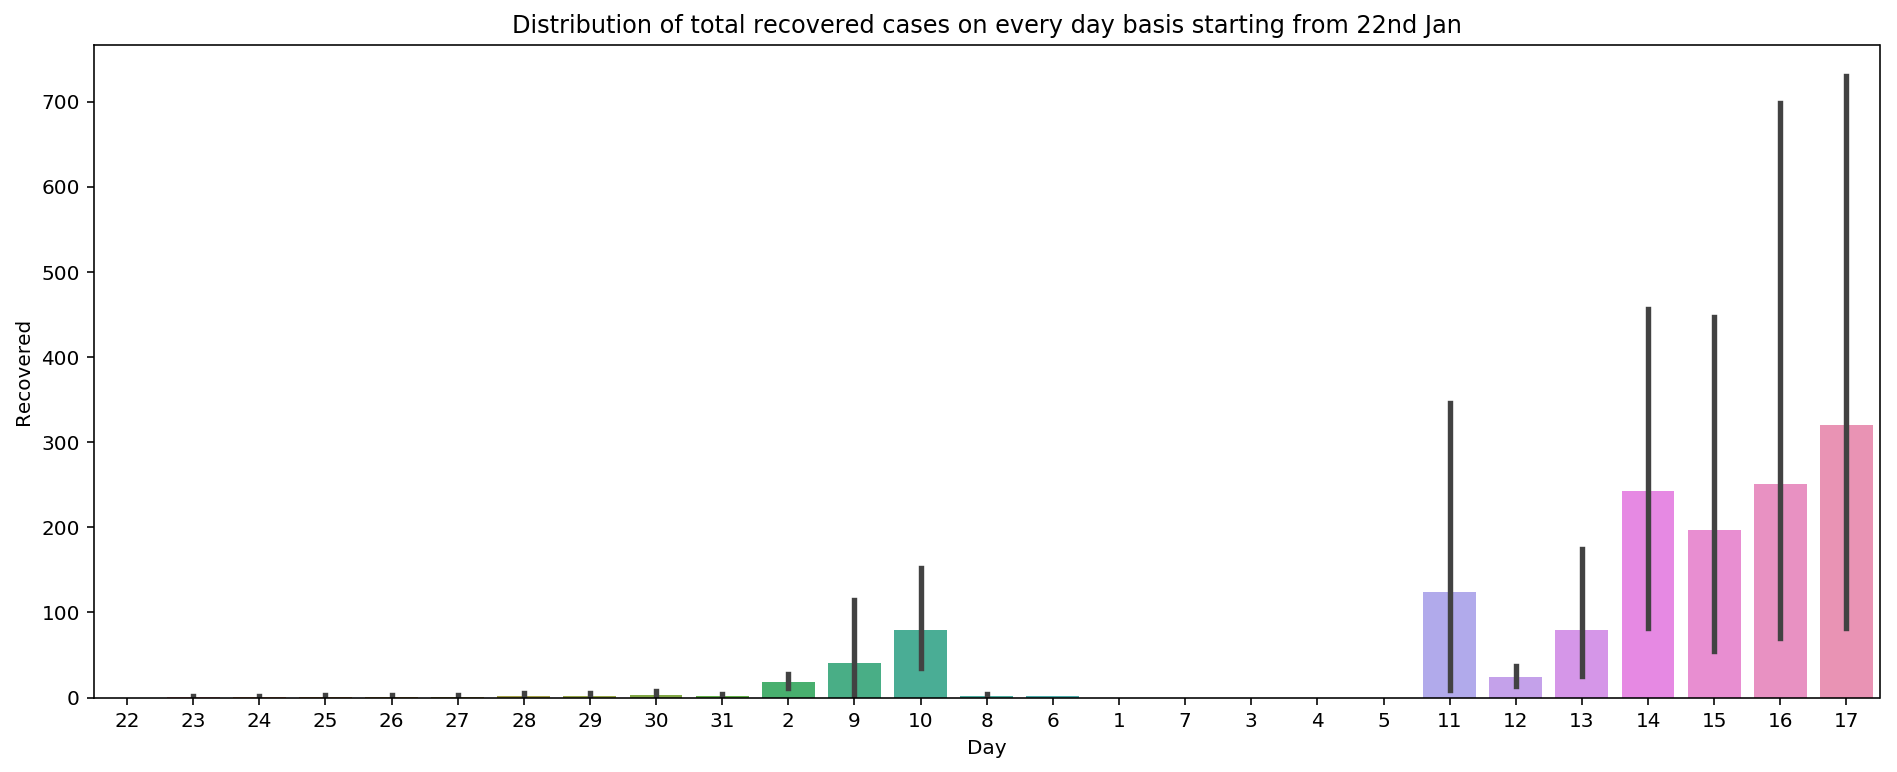

In [12]:
formatted_text('***Recovered Cases vs Day***')
plt.figure(figsize=(16,6))
sns.barplot(x='Day',y='Recovered',data=nCoV_data, order=nCoV_data.Day.unique().tolist())
plt.title('Distribution of total recovered cases on every day basis starting from 22nd Jan')

**=> As we see from the plots above, China (& Main Land China) are the worst affected regions with majority of the cases being detected right from the onset of the dealdy outbreak.**

# Current Situation

**Lets now take a look at the latest numbers. We will create a net dataset to store just the latest information.**

In [13]:
# Make the latest data extraction generic. As the data is getting updated on a daily (hourly) basis, 
# the below code would work without needing to be updated to extract the latest data.
# We will here extract the year, month and day from the last reported case and use it.
strDate = nCoV_data['Date'][-1:].astype('str')
year = int(strDate.values[0].split('-')[0])
month = int(strDate.values[0].split('-')[1])
day = int(strDate.values[0].split('-')[2].split()[0])

formatted_text('***Last reported case date-time***')
print(strDate)
print(year)
print(month)
print(strDate.values[0].split('-')[2].split())

***Last reported case date-time***

1718    2020-02-17 22:00:00
Name: Date, dtype: object
2020
2
['17', '22:00:00']


In [14]:
latest_nCoV_data = nCoV_data[nCoV_data['Date'] > pd.Timestamp(date(year,month,day))]

# Data Glimpse
latest_nCoV_data.tail()

,Date,State,Country,LastUpdate,Confirmed,Deaths,Recovered,Day,Hour
1714,2020-02-17 22:00:00,"Madison, WI",US,2020-02-05 21:53:02,1.0,0.0,0.0,5,21
1715,2020-02-17 22:00:00,"Orange, CA",US,2020-02-01 19:53:03,1.0,0.0,0.0,1,19
1716,2020-02-17 22:00:00,"San Antonio, TX",US,2020-02-13 18:53:02,1.0,0.0,0.0,13,18
1717,2020-02-17 22:00:00,"Seattle, WA",US,2020-02-09 07:03:04,1.0,0.0,1.0,9,7
1718,2020-02-17 22:00:00,"Tempe, AZ",US,2020-02-01 19:43:03,1.0,0.0,0.0,1,19


In [15]:
# Getting the latest numbers

formatted_text('***Latest Numbers Globaly***')
print('Confirmed Cases around the globe : ',latest_nCoV_data['Confirmed'].sum())
print('Deaths Confirmed around the globe: ',latest_nCoV_data['Deaths'].sum())
print('Recovered Cases around the globe : ',latest_nCoV_data['Recovered'].sum())

***Latest Numbers Globaly***

Confirmed Cases around the globe :  73260.0
Deaths Confirmed around the globe:  1868.0
Recovered Cases around the globe :  12583.0


## Analysis of the confirmed Virus Spread Country Wise

In [16]:
formatted_text('***Countries Affected WorldWide as per the current date -***')
allCountries = latest_nCoV_data['Country'].unique().tolist()
print(allCountries)

print("\nTotal countries affected by virus: ",len(allCountries))

***Countries Affected WorldWide as per the current date -***

['China', 'Others', 'Singapore', 'Japan', 'Hong Kong', 'Thailand', 'South Korea', 'Malaysia', 'Taiwan', 'Germany', 'Vietnam', 'France', 'Macau', 'UK', 'United Arab Emirates', 'Australia', 'Canada', 'India', 'Italy', 'Philippines', 'Russia', 'Spain', 'US', 'Belgium', 'Cambodia', 'Egypt', 'Finland', 'Nepal', 'Sri Lanka', 'Sweden']

Total countries affected by virus:  30


In [17]:
CountryWiseData = pd.DataFrame(latest_nCoV_data.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum())
CountryWiseData['Country'] = CountryWiseData.index
CountryWiseData.index = np.arange(1, len(allCountries)+1)

CountryWiseData = CountryWiseData[['Country','Confirmed', 'Deaths', 'Recovered']]

formatted_text('***Country wise Analysis of ''Confirmed'', ''Deaths'', ''Recovered'' Cases***')
CountryWiseData

***Country wise Analysis of Confirmed, Deaths, Recovered Cases***

,Country,Confirmed,Deaths,Recovered
1,Australia,15.0,0.0,10.0
2,Belgium,1.0,0.0,1.0
3,Cambodia,1.0,0.0,1.0
4,Canada,8.0,0.0,1.0
5,China,72364.0,1863.0,12455.0
6,Egypt,1.0,0.0,0.0
7,Finland,1.0,0.0,1.0
8,France,12.0,1.0,4.0
9,Germany,16.0,0.0,1.0
10,Hong Kong,60.0,1.0,2.0


***Country wise Analysis of Confirmed, Deaths, Recovered Cases***

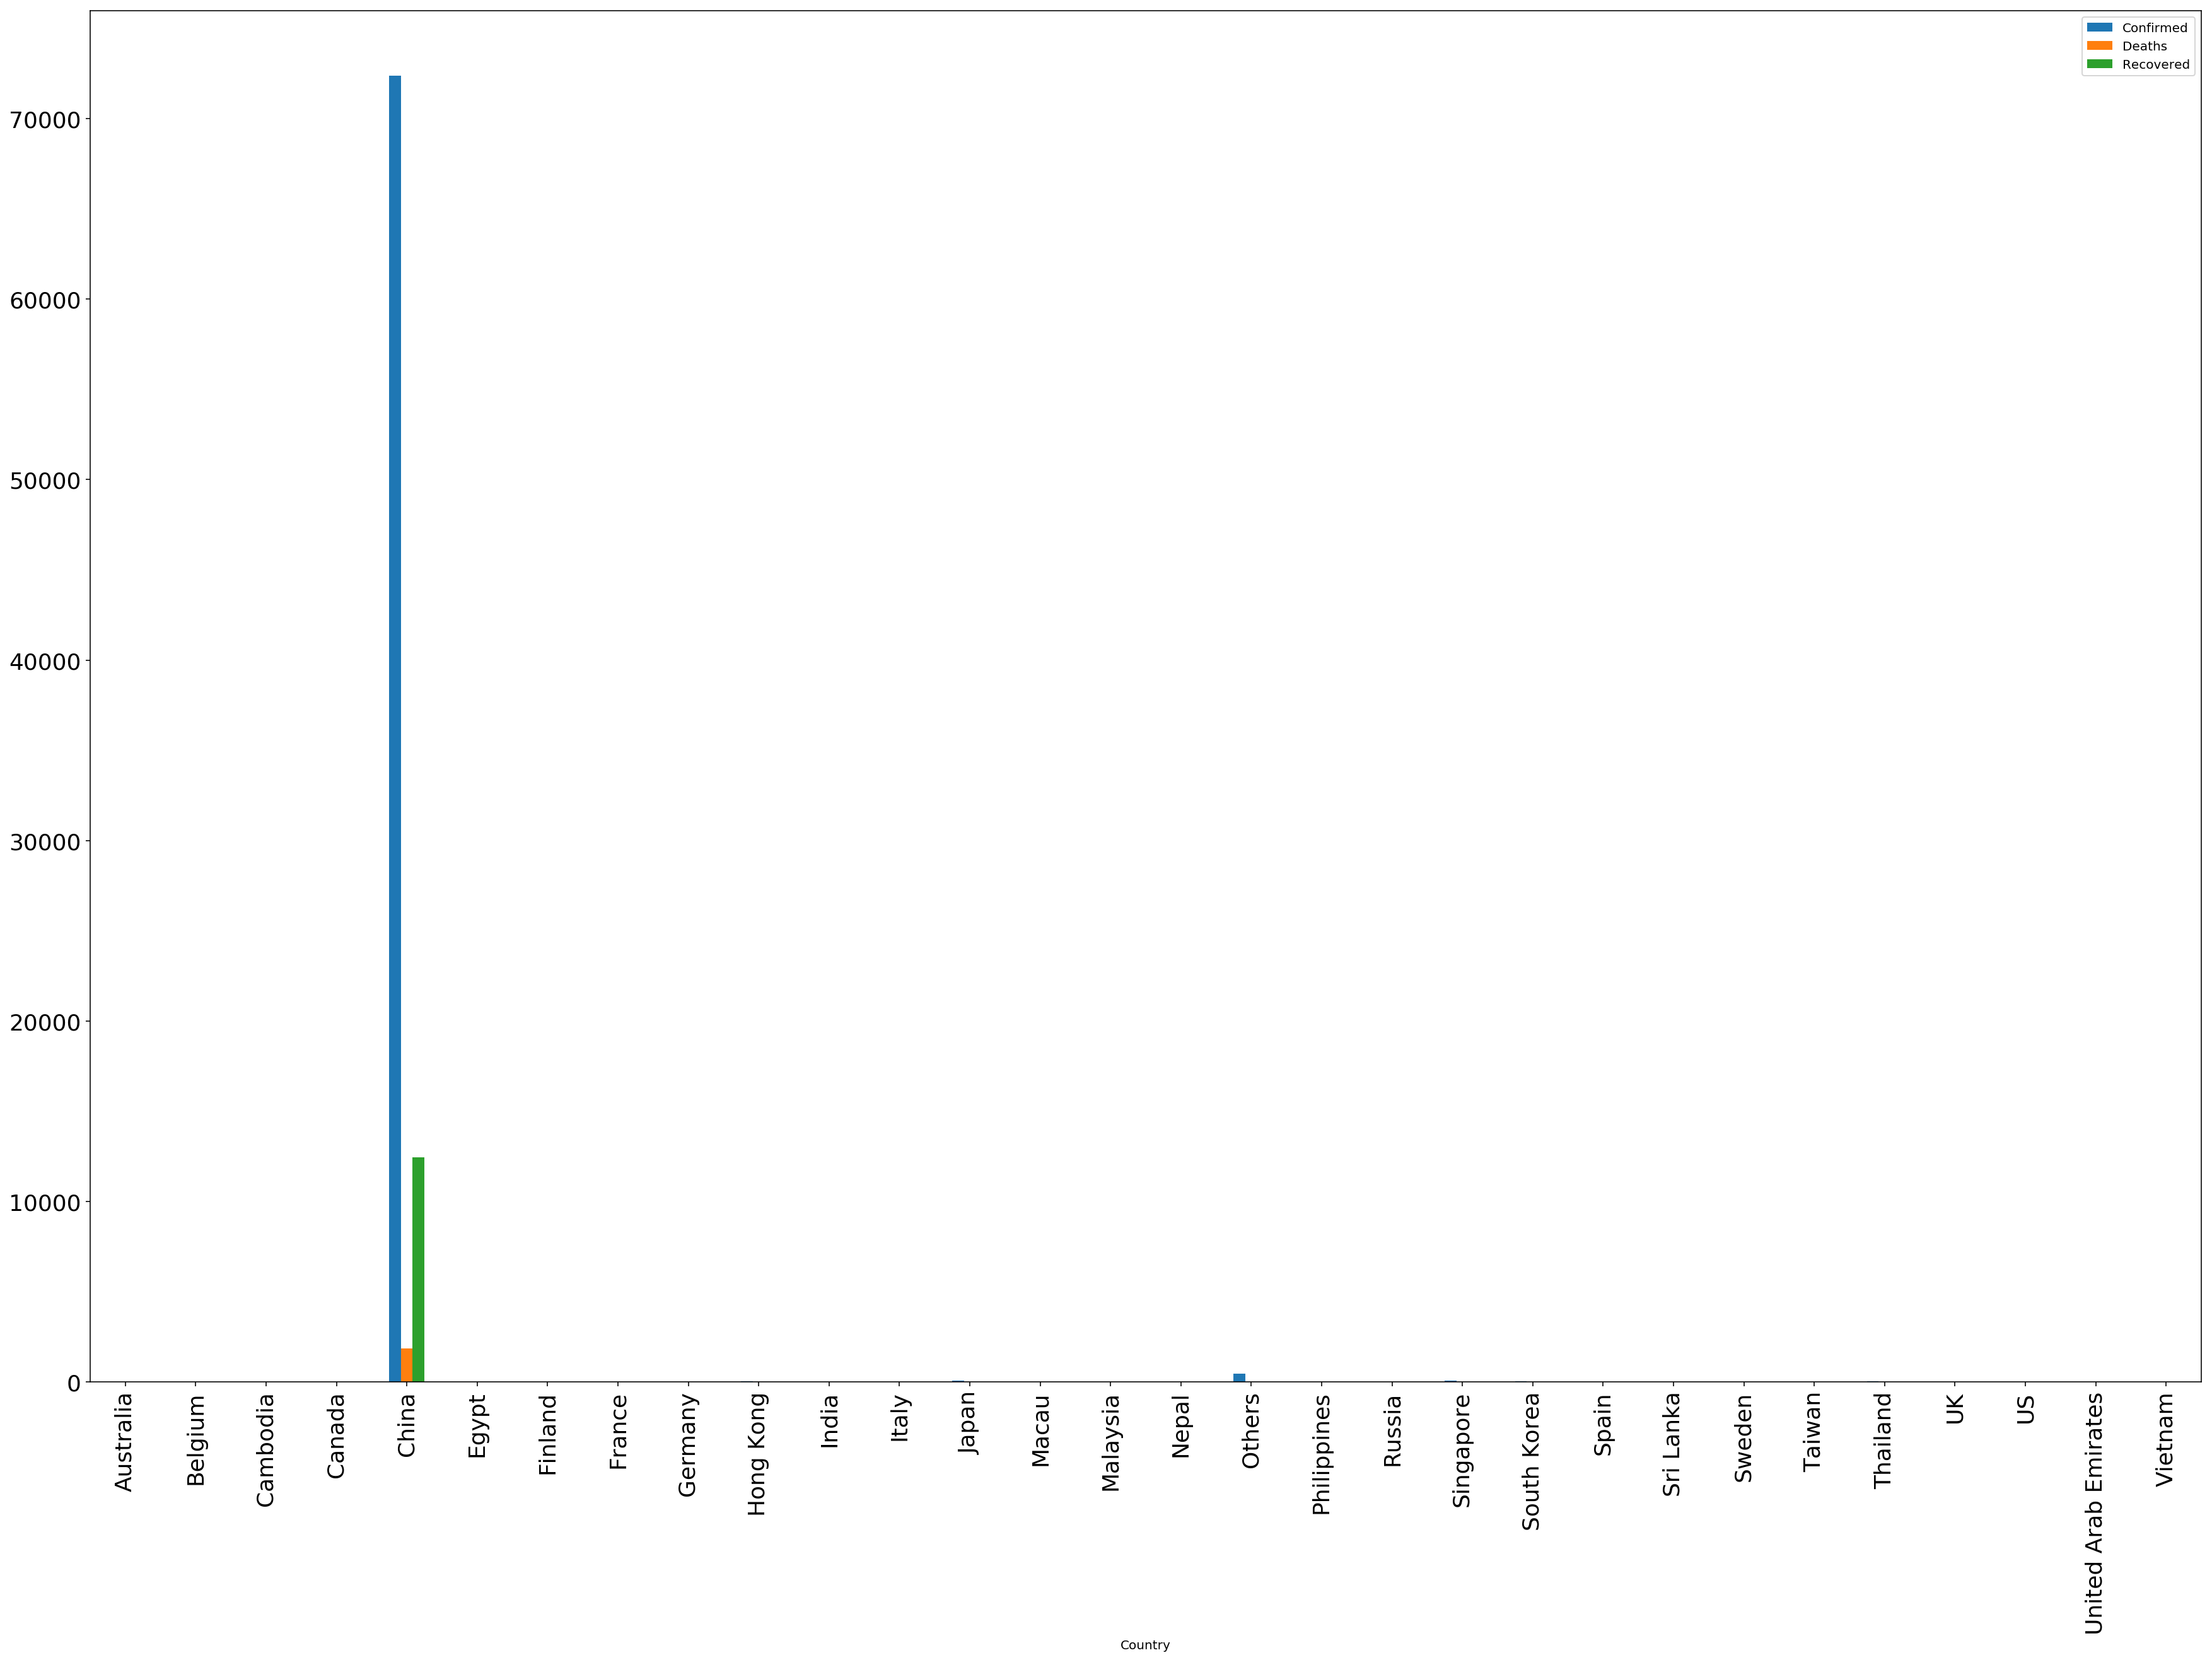

In [18]:
formatted_text('***Country wise Analysis of ''Confirmed'', ''Deaths'', ''Recovered'' Cases***')
CountryWiseData.plot('Country',['Confirmed', 'Deaths', 'Recovered'],kind='bar',figsize=(30,20), fontsize=18)

**INFERENCES**

1. CHINA has the most recorded cases as the outbreak happenned there
2. The virus has spread to other countries as well. This could be due to people being present in China/Hubei as the time 
   of the outbreak and in the event of their return to home country unknowingly carried the virus along.

## Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases

In [19]:
date_wise_data = nCoV_data[["Date","Confirmed","Deaths","Recovered"]]
date_wise_data.head()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,1.0,0.0,0.0
1,2020-01-22 12:00:00,14.0,0.0,0.0
2,2020-01-22 12:00:00,6.0,0.0,0.0
3,2020-01-22 12:00:00,1.0,0.0,0.0
4,2020-01-22 12:00:00,0.0,0.0,0.0


In [20]:
date_wise_data = date_wise_data.groupby(["Date"]).sum().reset_index()

# strip off the time part from date for day-wise distribution
date_wise_data.Date = date_wise_data.Date.apply(lambda x:x.date())

formatted_text('***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***')
date_wise_data

***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555.0,0.0,0.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,2019.0,56.0,49.0
4,2020-01-26,2794.0,80.0,54.0
5,2020-01-27,4473.0,107.0,63.0
6,2020-01-28,6057.0,132.0,110.0
7,2020-01-29,7783.0,170.0,133.0
8,2020-01-30,9776.0,213.0,187.0
9,2020-01-31,11374.0,259.0,252.0


***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***

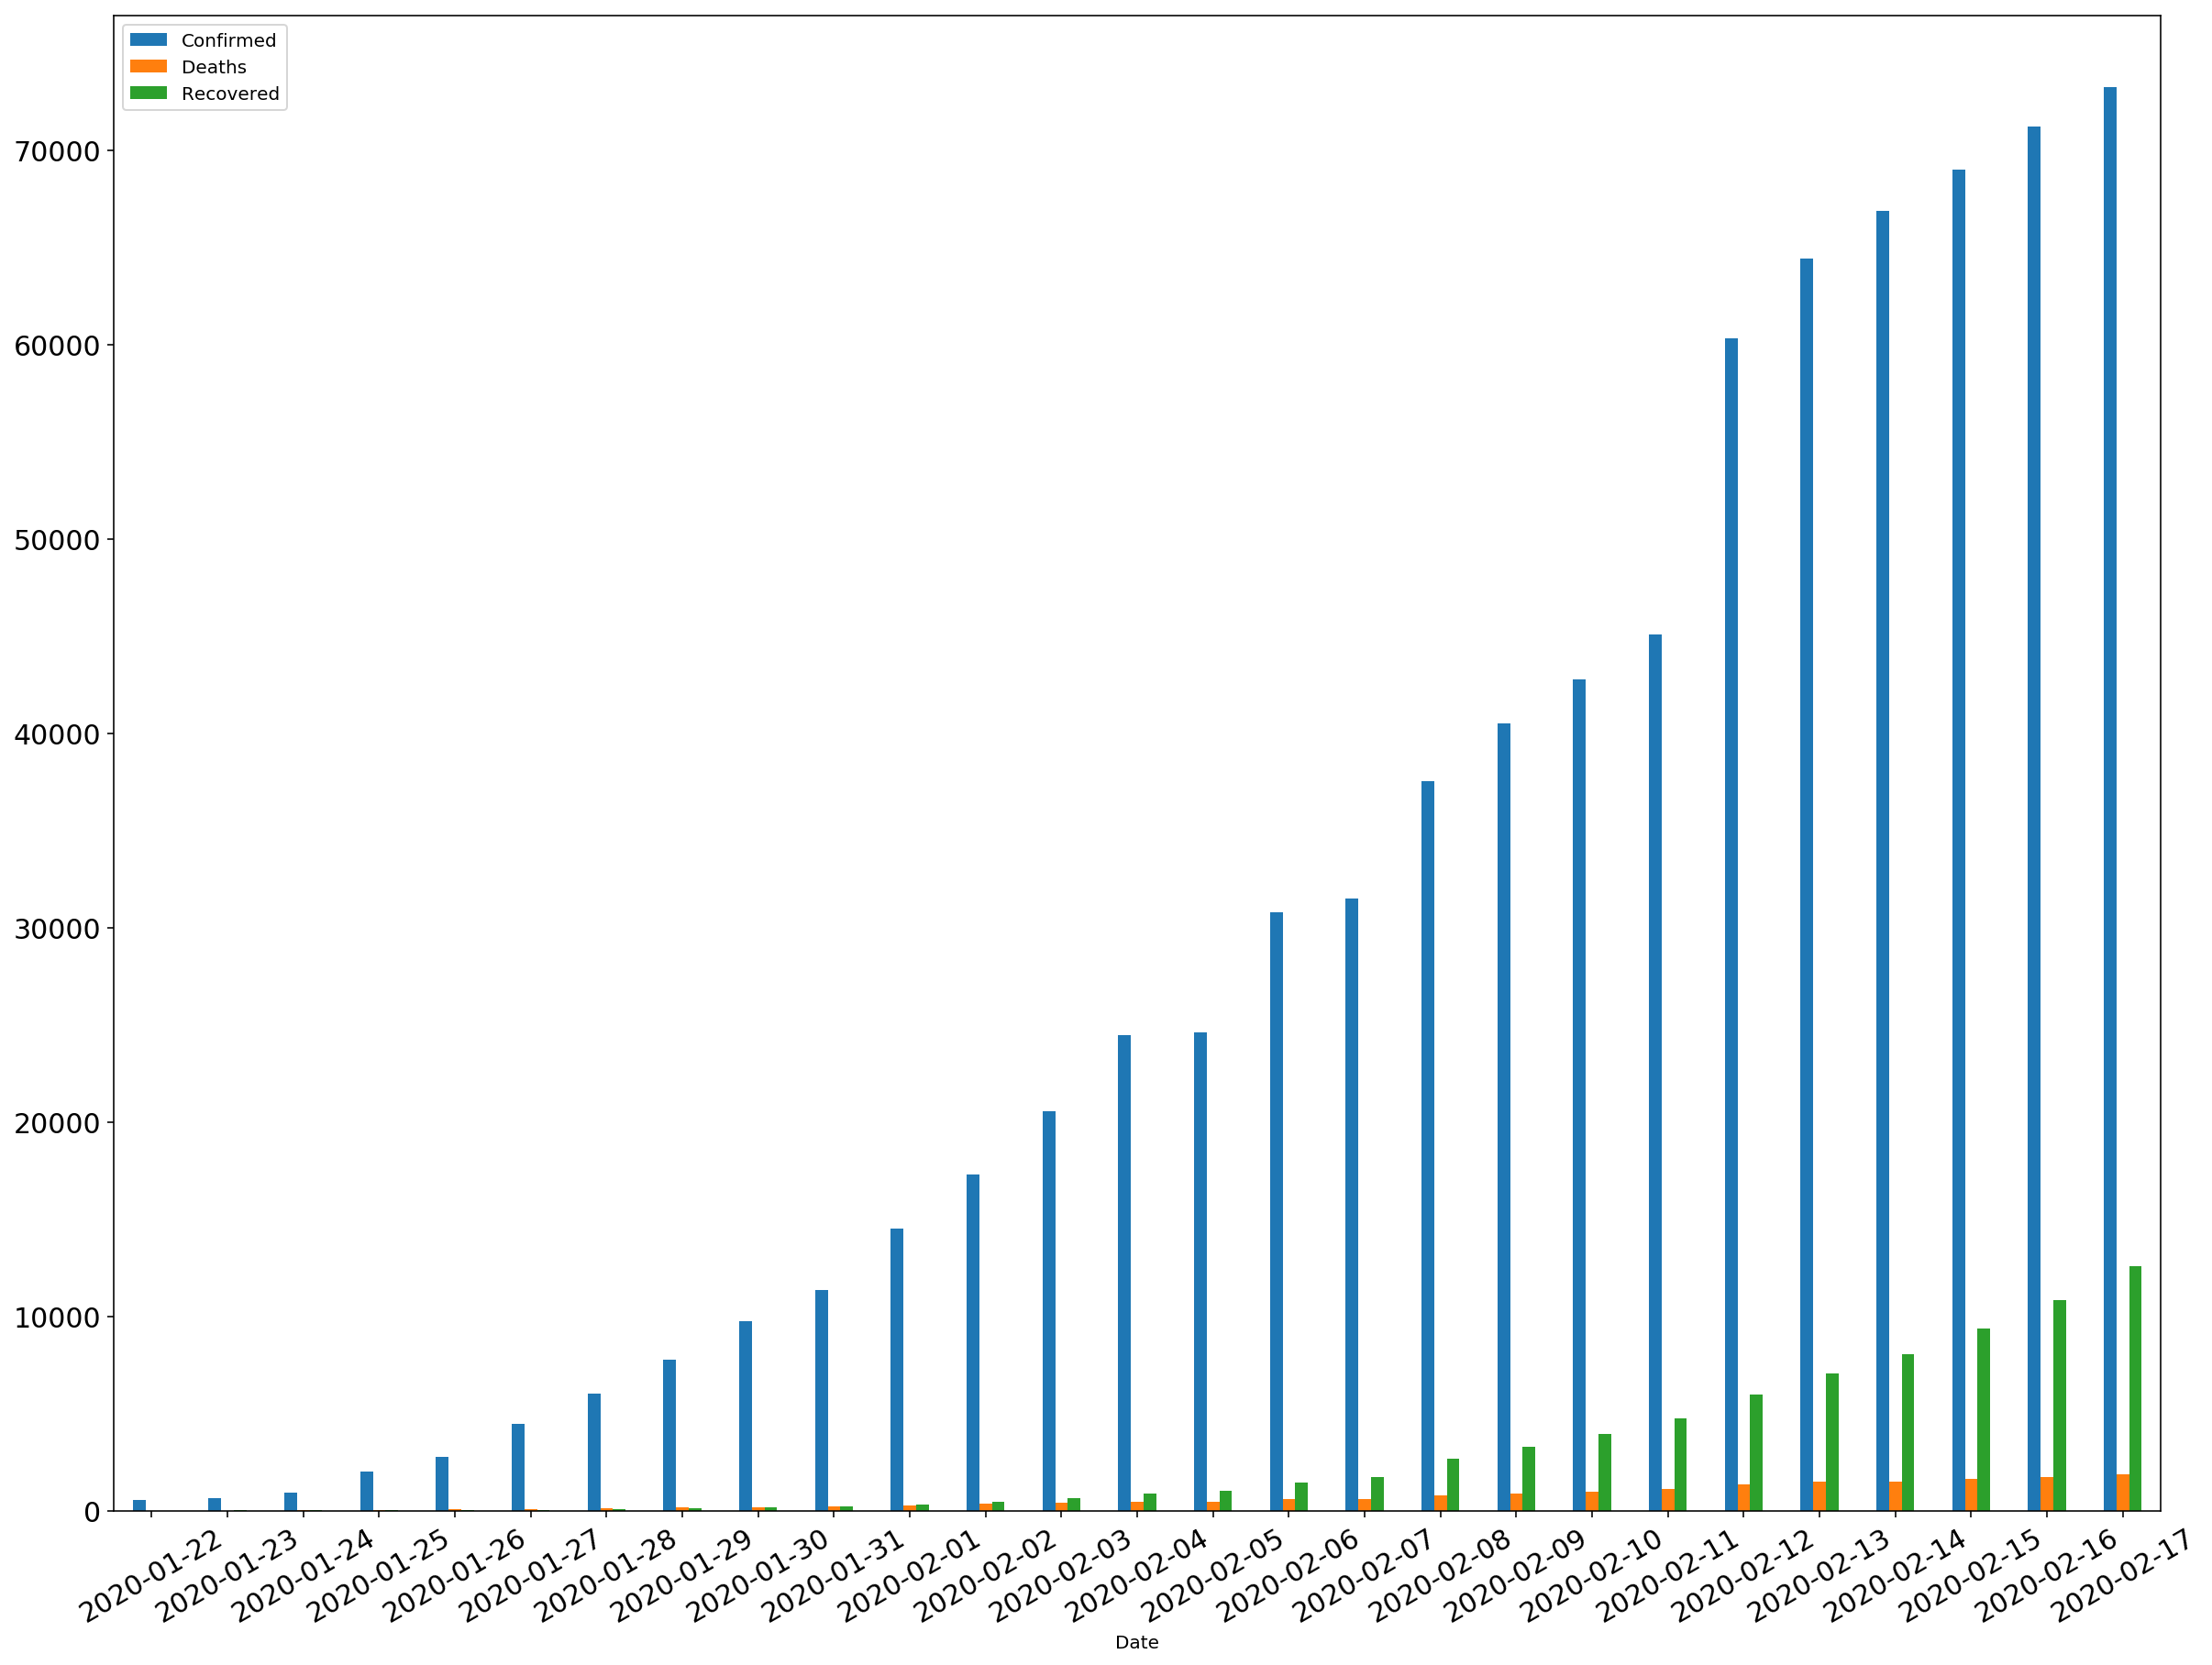

In [21]:
formatted_text('***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***')
date_wise_data.plot('Date',['Confirmed', 'Deaths', 'Recovered'],kind='bar',figsize=(20,15), fontsize=15, rot=30)

***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***

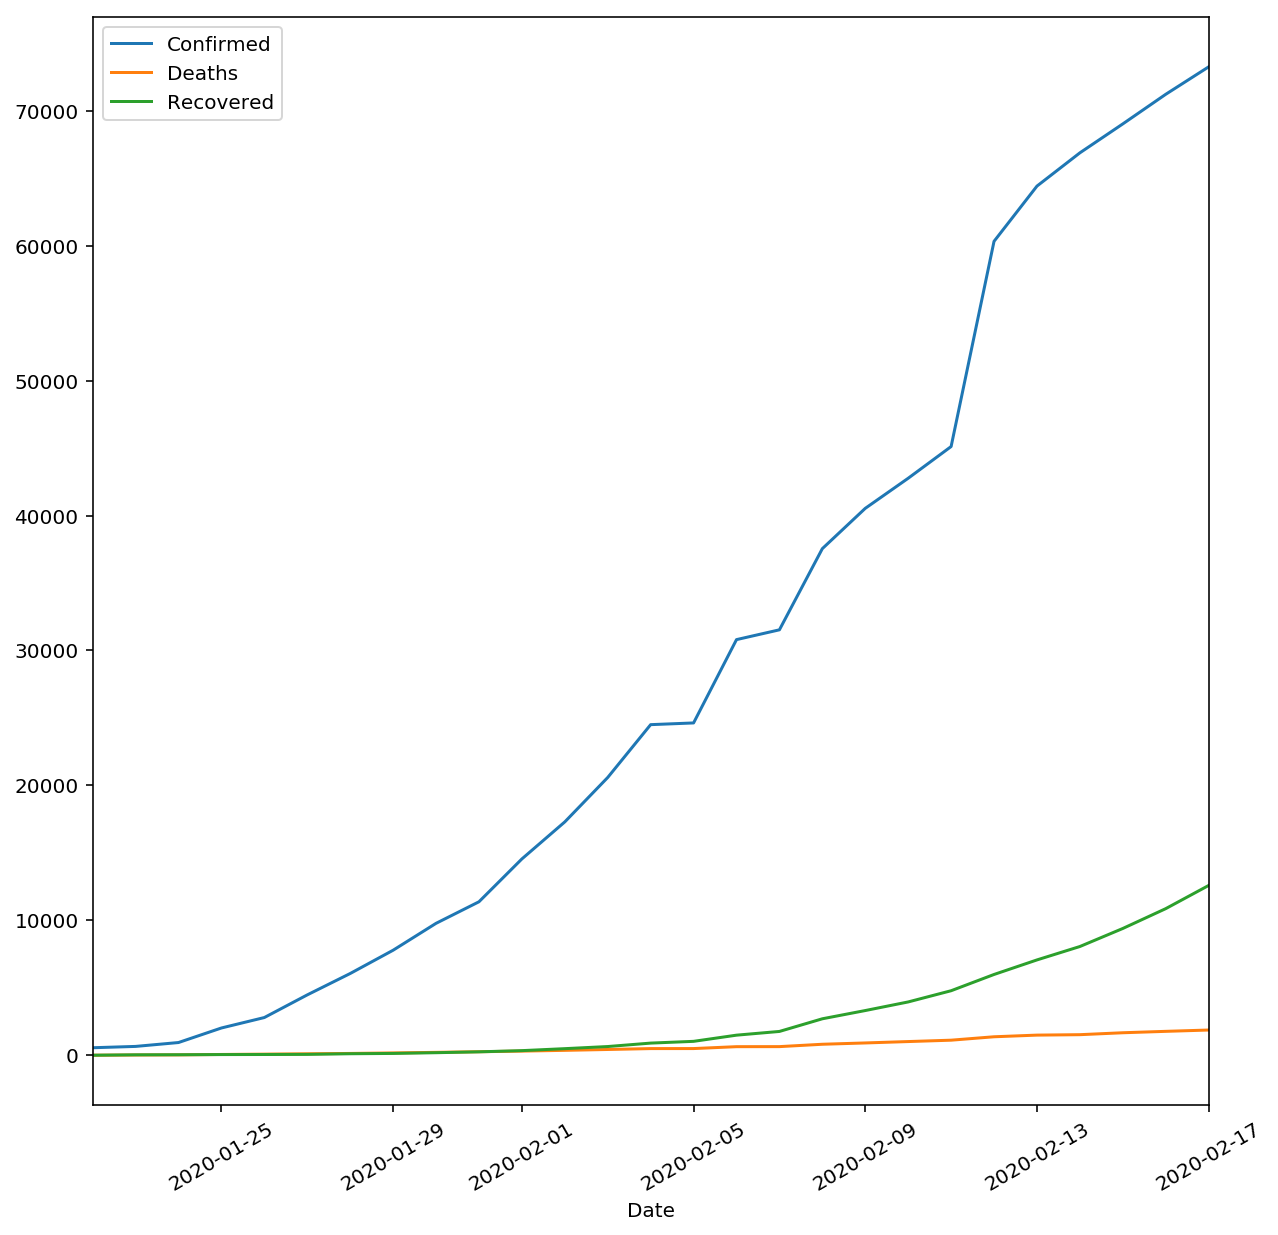

In [22]:
formatted_text('***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***')
date_wise_data.plot('Date',['Confirmed', 'Deaths', 'Recovered'],figsize=(10,10), rot=30)

## Global Spread Over Time

In [23]:
global_data_over_time = date_wise_data.groupby('Date')['Confirmed','Deaths','Recovered'].sum().reset_index()

plot = make_subplots(rows=1, cols=3, subplot_titles=("Comfirmed", "Deaths", "Recovered"))

subPlot1 = go.Scatter(
                x=global_data_over_time['Date'],
                y=global_data_over_time['Confirmed'],
                name="Confirmed",
                line_color='orange',
                opacity=0.8)

subPlot2 = go.Scatter(
                x=global_data_over_time['Date'],
                y=global_data_over_time['Deaths'],
                name="Deaths",
                line_color='red',
                opacity=0.8)

subPlot3 = go.Scatter(
                x=global_data_over_time['Date'],
                y=global_data_over_time['Recovered'],
                name="Recovered",
                line_color='green',
                opacity=0.8)

plot.append_trace(subPlot1, 1, 1)
plot.append_trace(subPlot2, 1, 2)
plot.append_trace(subPlot3, 1, 3)
plot.update_layout(template="ggplot2", title_text = '<b>Global Spread of the nCov Over Time</b>')

plot.show()

**INFERENCES**

1. The number of confirmed cases is on the rise day by day. The rise is very steep. 
2. The recovery does not look that great. The number of cases recovered is far more less the the number of confirmed cases.
3. The number of death cases till tade has been 492.

## Distribution in China

In [24]:
china_latest_data = latest_nCoV_data[latest_nCoV_data['Country']=='China'][["State","Confirmed","Deaths","Recovered"]]

# Reset Index
china_latest_data.reset_index(drop=True, inplace=True)
china_latest_data.index = pd.RangeIndex(start=1, stop=len(china_latest_data['State']) + 1, step=1)

formatted_text('***Numbers in China for Confirmed, Deaths and Recovered Cases***')

# Data Glimpse
china_latest_data

***Numbers in China for Confirmed, Deaths and Recovered Cases***

,State,Confirmed,Deaths,Recovered
1,Hubei,59989.0,1789.0,7862.0
2,Guangdong,1322.0,4.0,524.0
3,Henan,1246.0,16.0,509.0
4,Zhejiang,1171.0,0.0,507.0
5,Hunan,1006.0,3.0,498.0
6,Anhui,973.0,6.0,280.0
7,Jiangxi,930.0,1.0,275.0
8,Jiangsu,626.0,0.0,258.0
9,Chongqing,553.0,5.0,225.0
10,Shandong,541.0,2.0,191.0


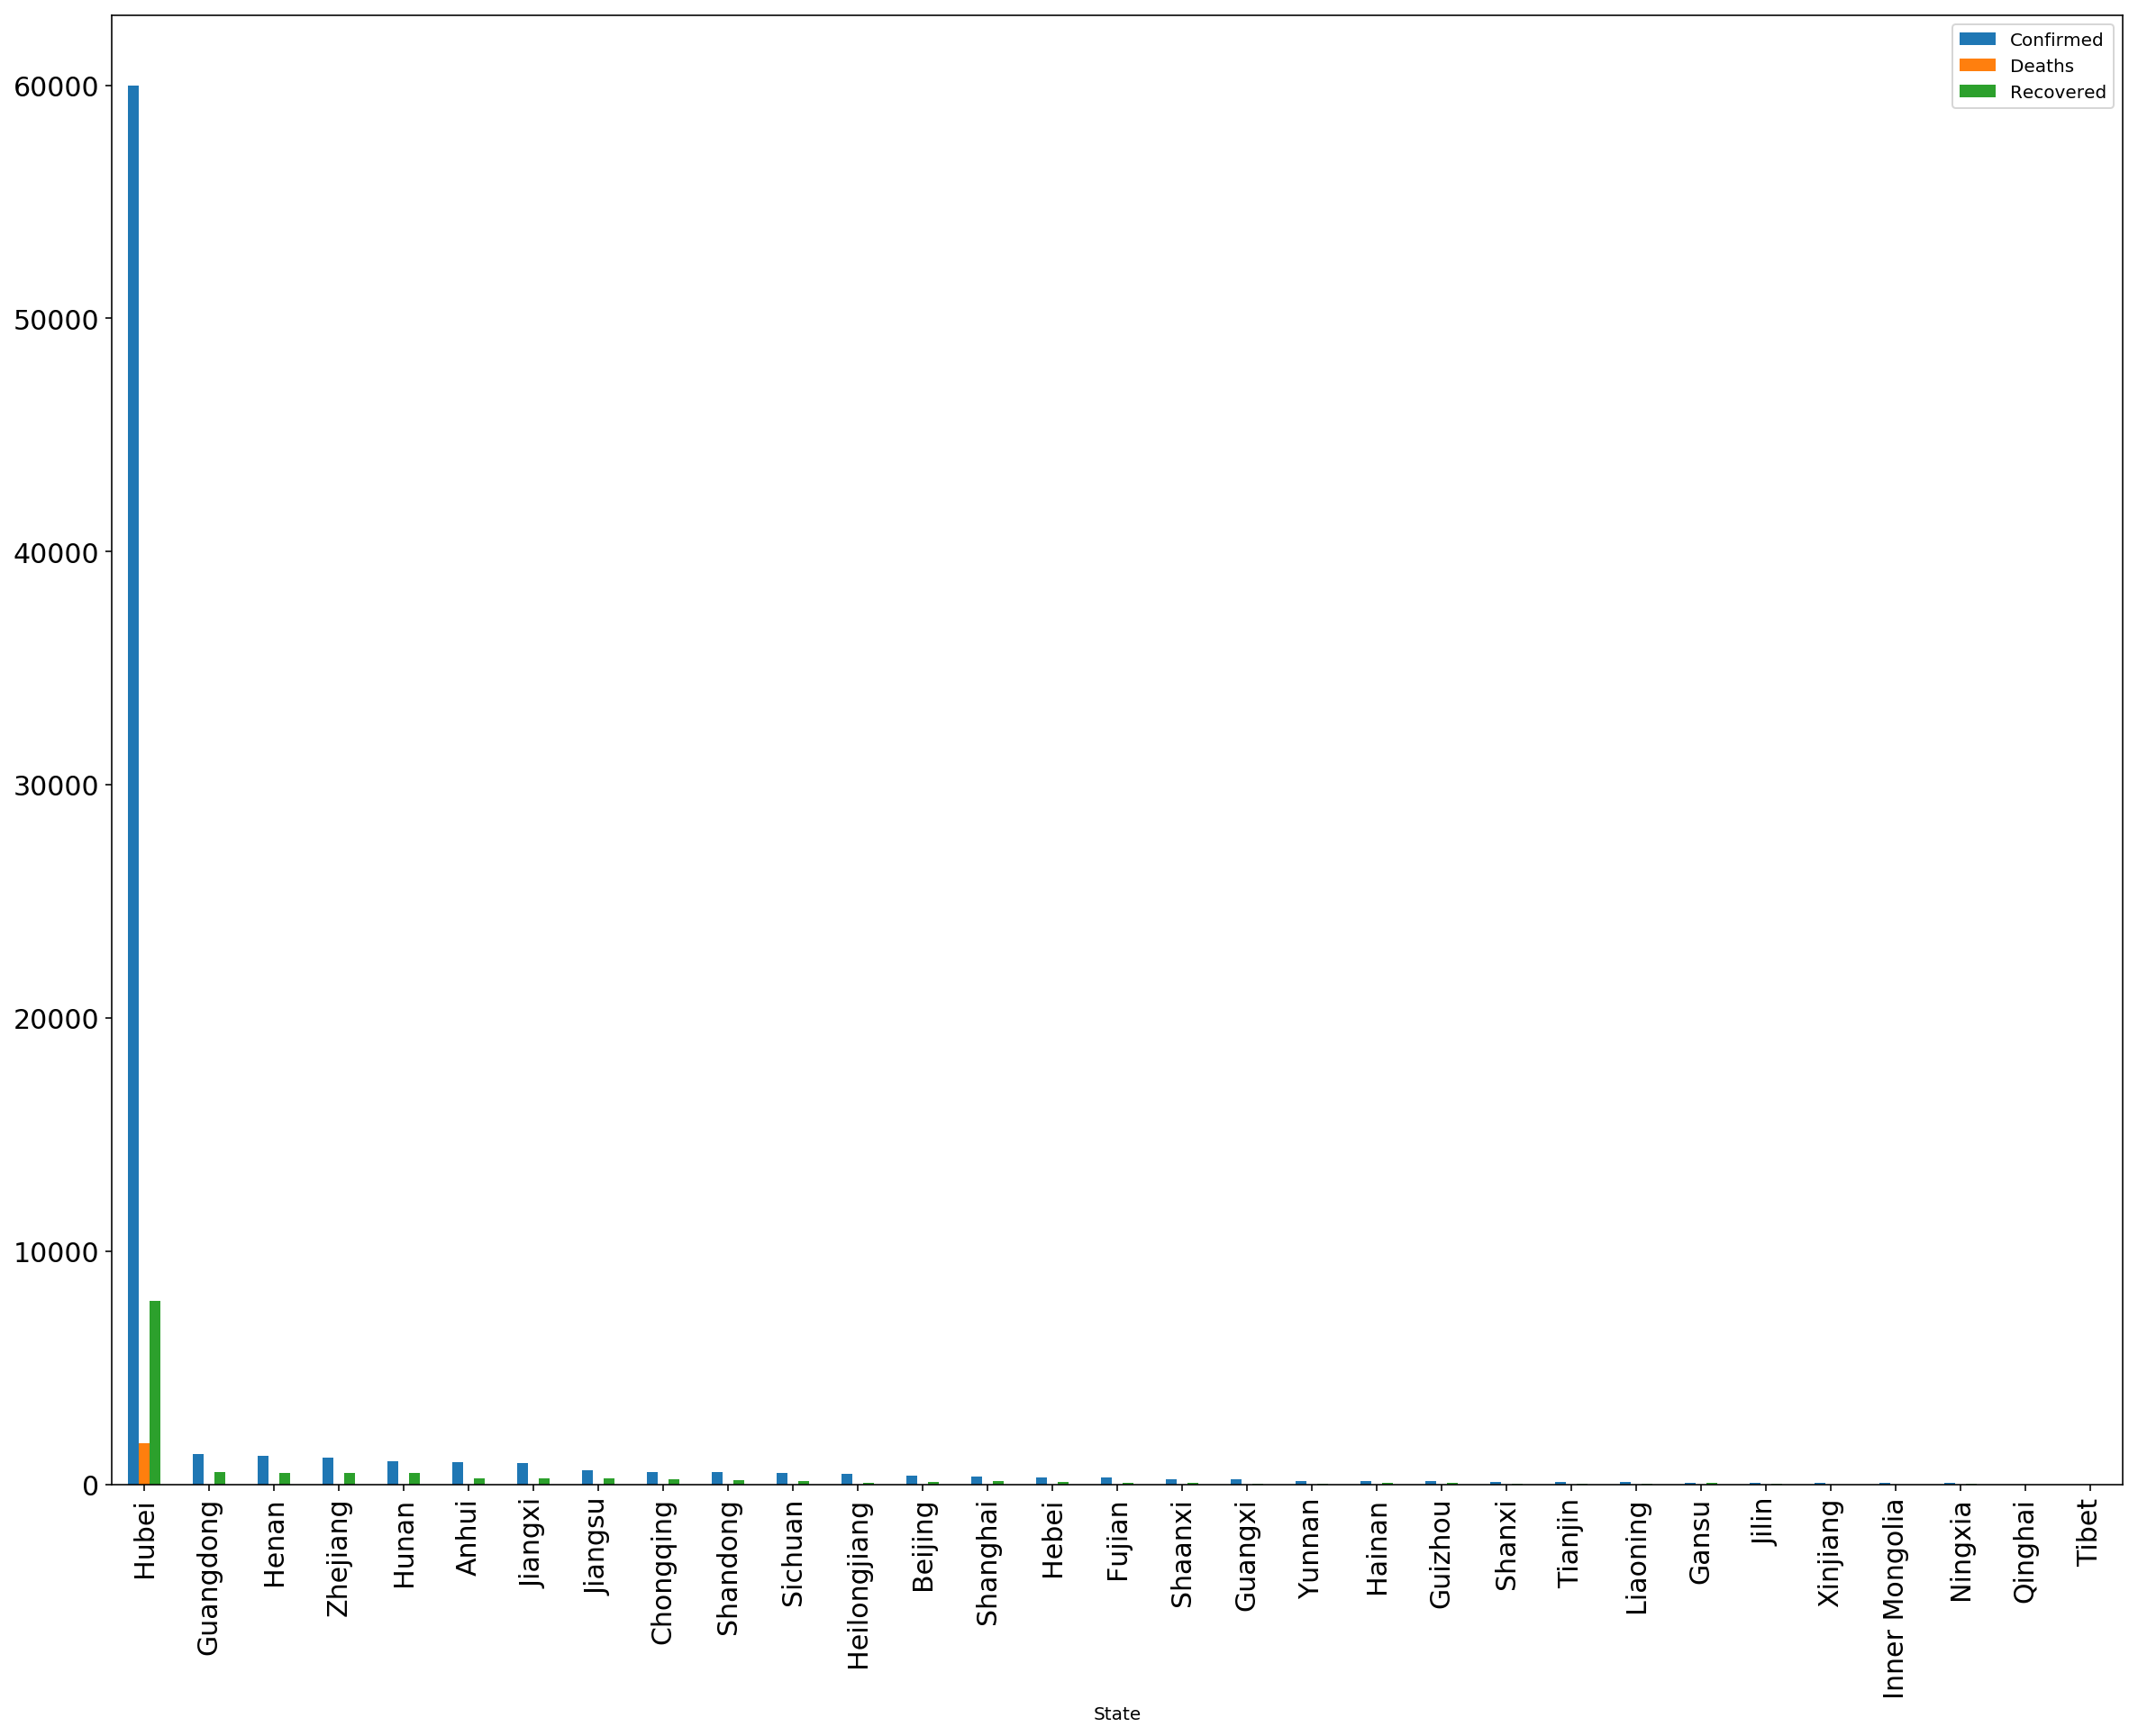

In [25]:
china_latest_data.plot('State',['Confirmed', 'Deaths', 'Recovered'],kind='bar',figsize=(20,15), fontsize=15)

## nCov Distribution - Hubei

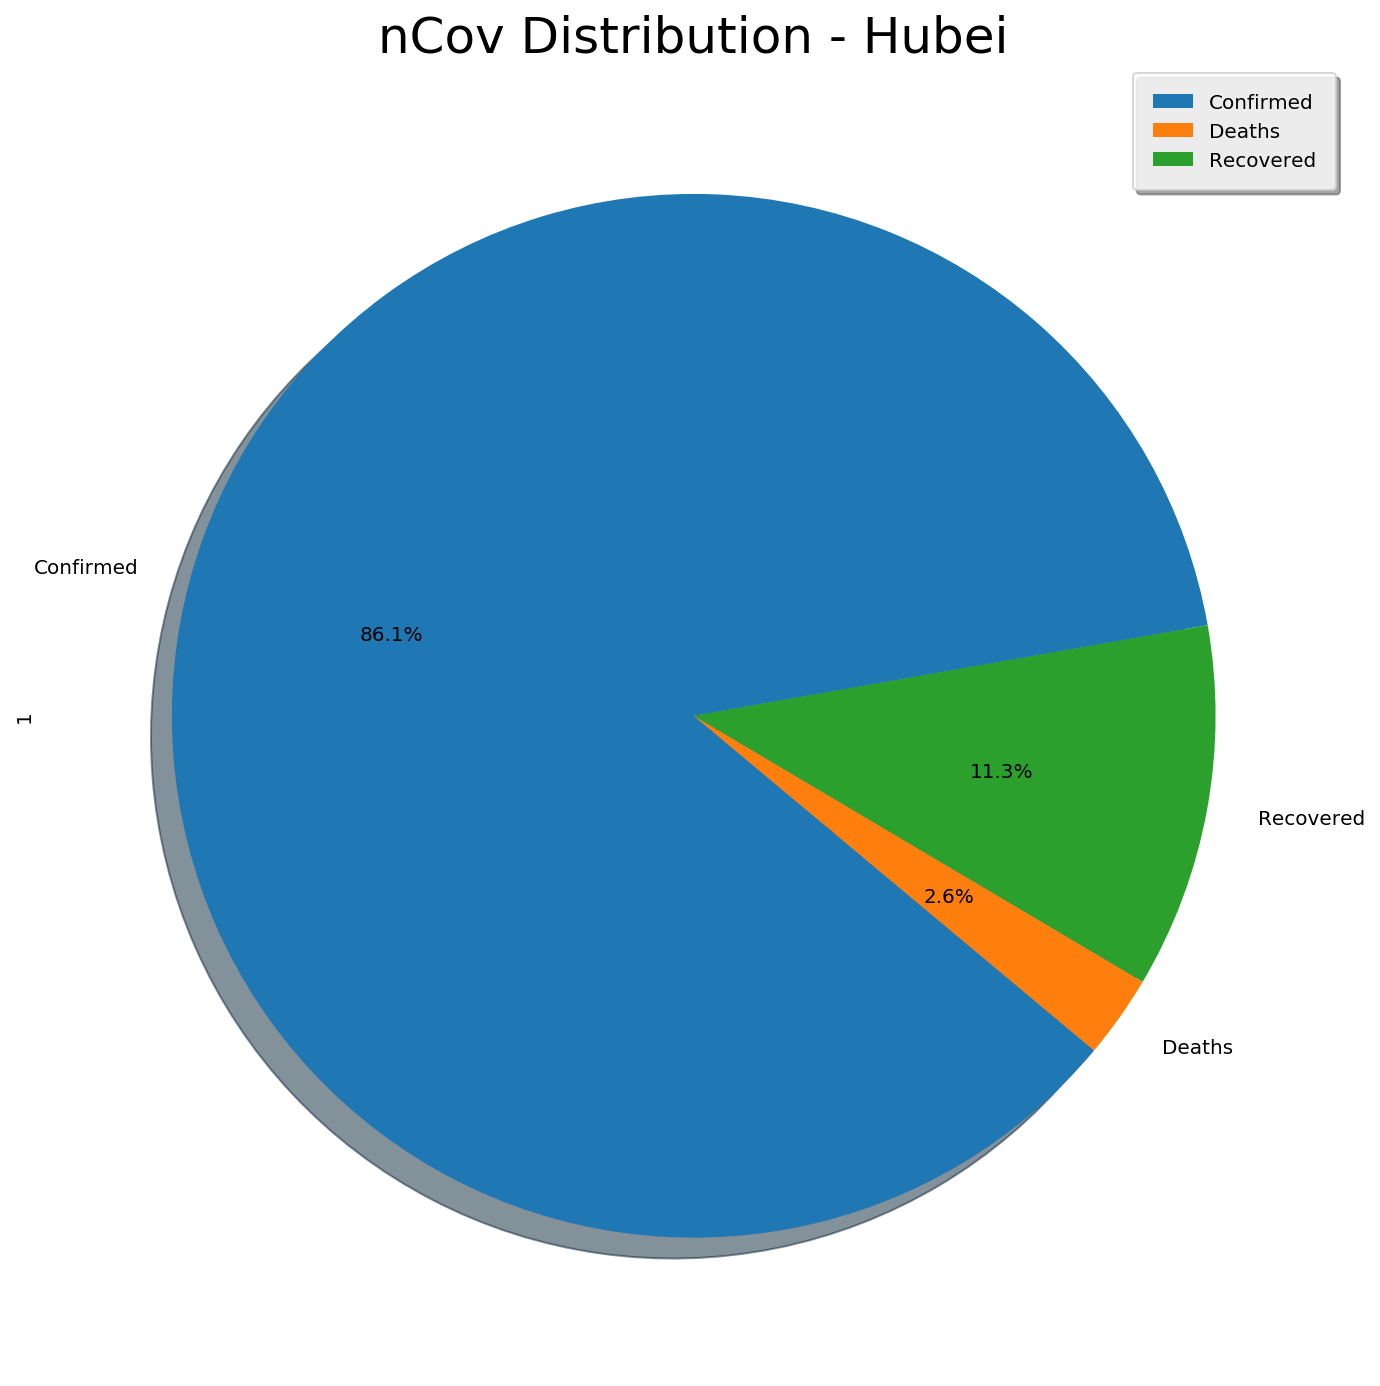

In [26]:
Hubei = china_latest_data[china_latest_data.State=='Hubei']
Hubei = Hubei[['Confirmed','Deaths','Recovered']] # Remove the state column as it does not have any numeric data
Hubei = Hubei.iloc[0]
#Hubei

plt.figure(figsize=(12,12))

Hubei.plot( kind='pie'
           , autopct='%1.1f%%'
           , shadow=True
           , startangle=10)

plt.title('nCov Distribution - Hubei',size=25)
plt.legend(loc = "upper right"
           , fontsize = 10
           , ncol = 1 
           , fancybox = True
           , framealpha = 0.80
           , shadow = True
           , borderpad = 1);

## Hubei - Spread Over Time

In [27]:
plot = make_subplots(rows=1, cols=3, subplot_titles=("Comfirmed", "Deaths", "Recovered"))

# to plot the spread over time, we would need the data distribution spread over time starting from 22nd Jan 2020
# so we will extract the sub-set from the original data.
hubei_data_over_time = nCoV_data[nCoV_data['State'] == 'Hubei']

subPlot1 = go.Scatter(
                x=hubei_data_over_time['Date'],
                y=hubei_data_over_time['Confirmed'],
                name="Confirmed",
                line_color='orange',
                opacity=0.8)
subPlot2 = go.Scatter(
                x=hubei_data_over_time['Date'],
                y=hubei_data_over_time['Deaths'],
                name="Deaths",
                line_color='red',
                opacity=0.8)

subPlot3 = go.Scatter(
                x=hubei_data_over_time['Date'],
                y=hubei_data_over_time['Recovered'],
                name="Recovered",
                line_color='green',
                opacity=0.8)

plot.append_trace(subPlot1, 1, 1)
plot.append_trace(subPlot2, 1, 2)
plot.append_trace(subPlot3, 1, 3)
plot.update_layout(template="ggplot2", title_text = '<b>Spread of the nCov Over Time In Hubei</b>')
plot.show()

**INFERENCES**

1. Hubei is the worst affected by nCov with almost 95% of cases reported.
2. The recovery from the virus has not been that rapid. As the number of cases being reported is increasing at a very 
   rapid rate and the virus being a new one proper medical treatment not available to treat the virus could the 
   possible reason for the slowed down recovery. This can also be the reason for the number of deaths increasing day by day.
   The virus does not match any other known virus. This raised concern because when a virus is new, we do not know how 
   it affects people.
   


**However a team of doctors in Thailand have seen some apparent success treating Coronavirus with drug cocktail.
   The doctors combined the anti-flu drug oseltamivir with lopinavir and ritonavir, anti-virals used to treat HIV, 
   Kriengsak said, adding the ministry was awaiting research results to prove the findings.**

**Read more at:**
https://economictimes.indiatimes.com/news/international/world-news/thailand-sees-apparent-success-treating-virus-with-drug-cocktail/articleshow/73879572.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst

## Rest Of China (Excluding Hubei)

In [28]:
rest_of_China = china_latest_data[china_latest_data['State'] !='Hubei'][["State", "Confirmed","Deaths","Recovered"]]

# Reset Index to start from 1
rest_of_China.reset_index(drop=True, inplace=True)
rest_of_China.index = pd.RangeIndex(start=1, stop=len(china_latest_data['State']), step=1)

formatted_text('***Numbers in rest of China for Confirmed, Deaths and Recovered Cases***')

# Data Glimpse
rest_of_China

***Numbers in rest of China for Confirmed, Deaths and Recovered Cases***

,State,Confirmed,Deaths,Recovered
1,Guangdong,1322.0,4.0,524.0
2,Henan,1246.0,16.0,509.0
3,Zhejiang,1171.0,0.0,507.0
4,Hunan,1006.0,3.0,498.0
5,Anhui,973.0,6.0,280.0
6,Jiangxi,930.0,1.0,275.0
7,Jiangsu,626.0,0.0,258.0
8,Chongqing,553.0,5.0,225.0
9,Shandong,541.0,2.0,191.0
10,Sichuan,495.0,3.0,156.0


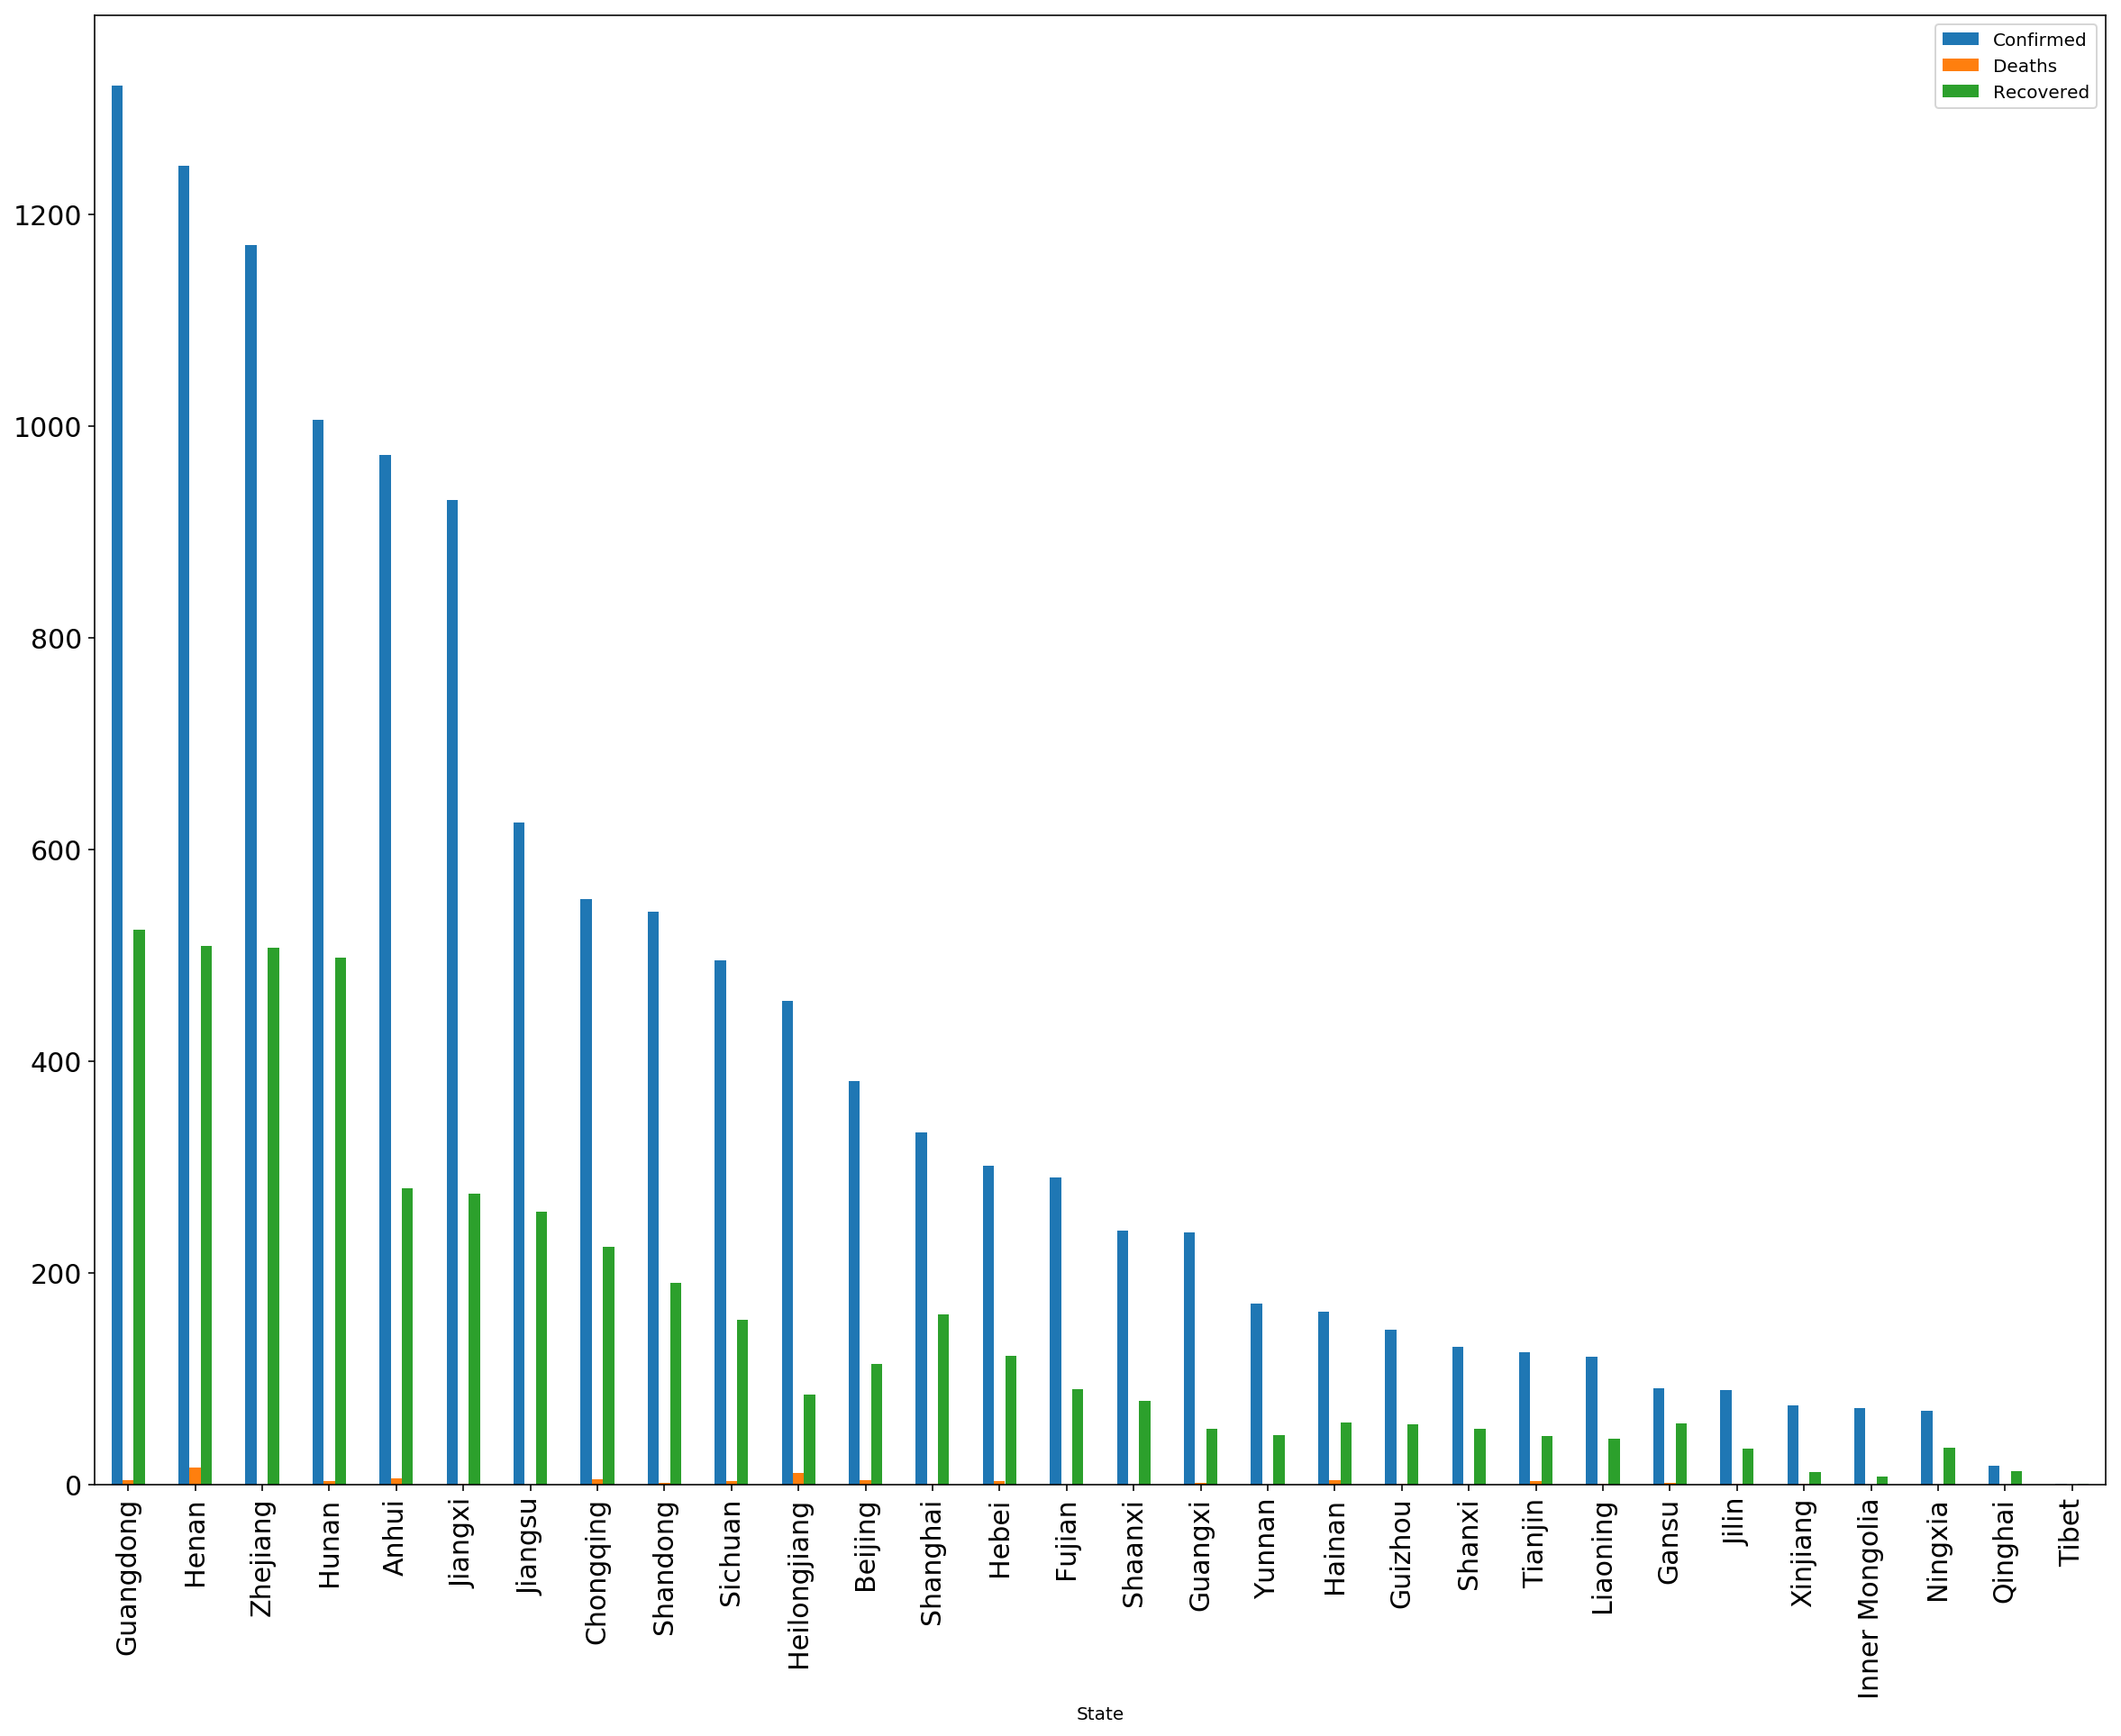

In [29]:
rest_of_China.plot('State',['Confirmed', 'Deaths', 'Recovered'],kind='bar',figsize=(20,15), fontsize=15)

([<matplotlib.axis.XTick at 0x7f9859d602b0>,
 <a list of 30 Text xticklabel objects>)

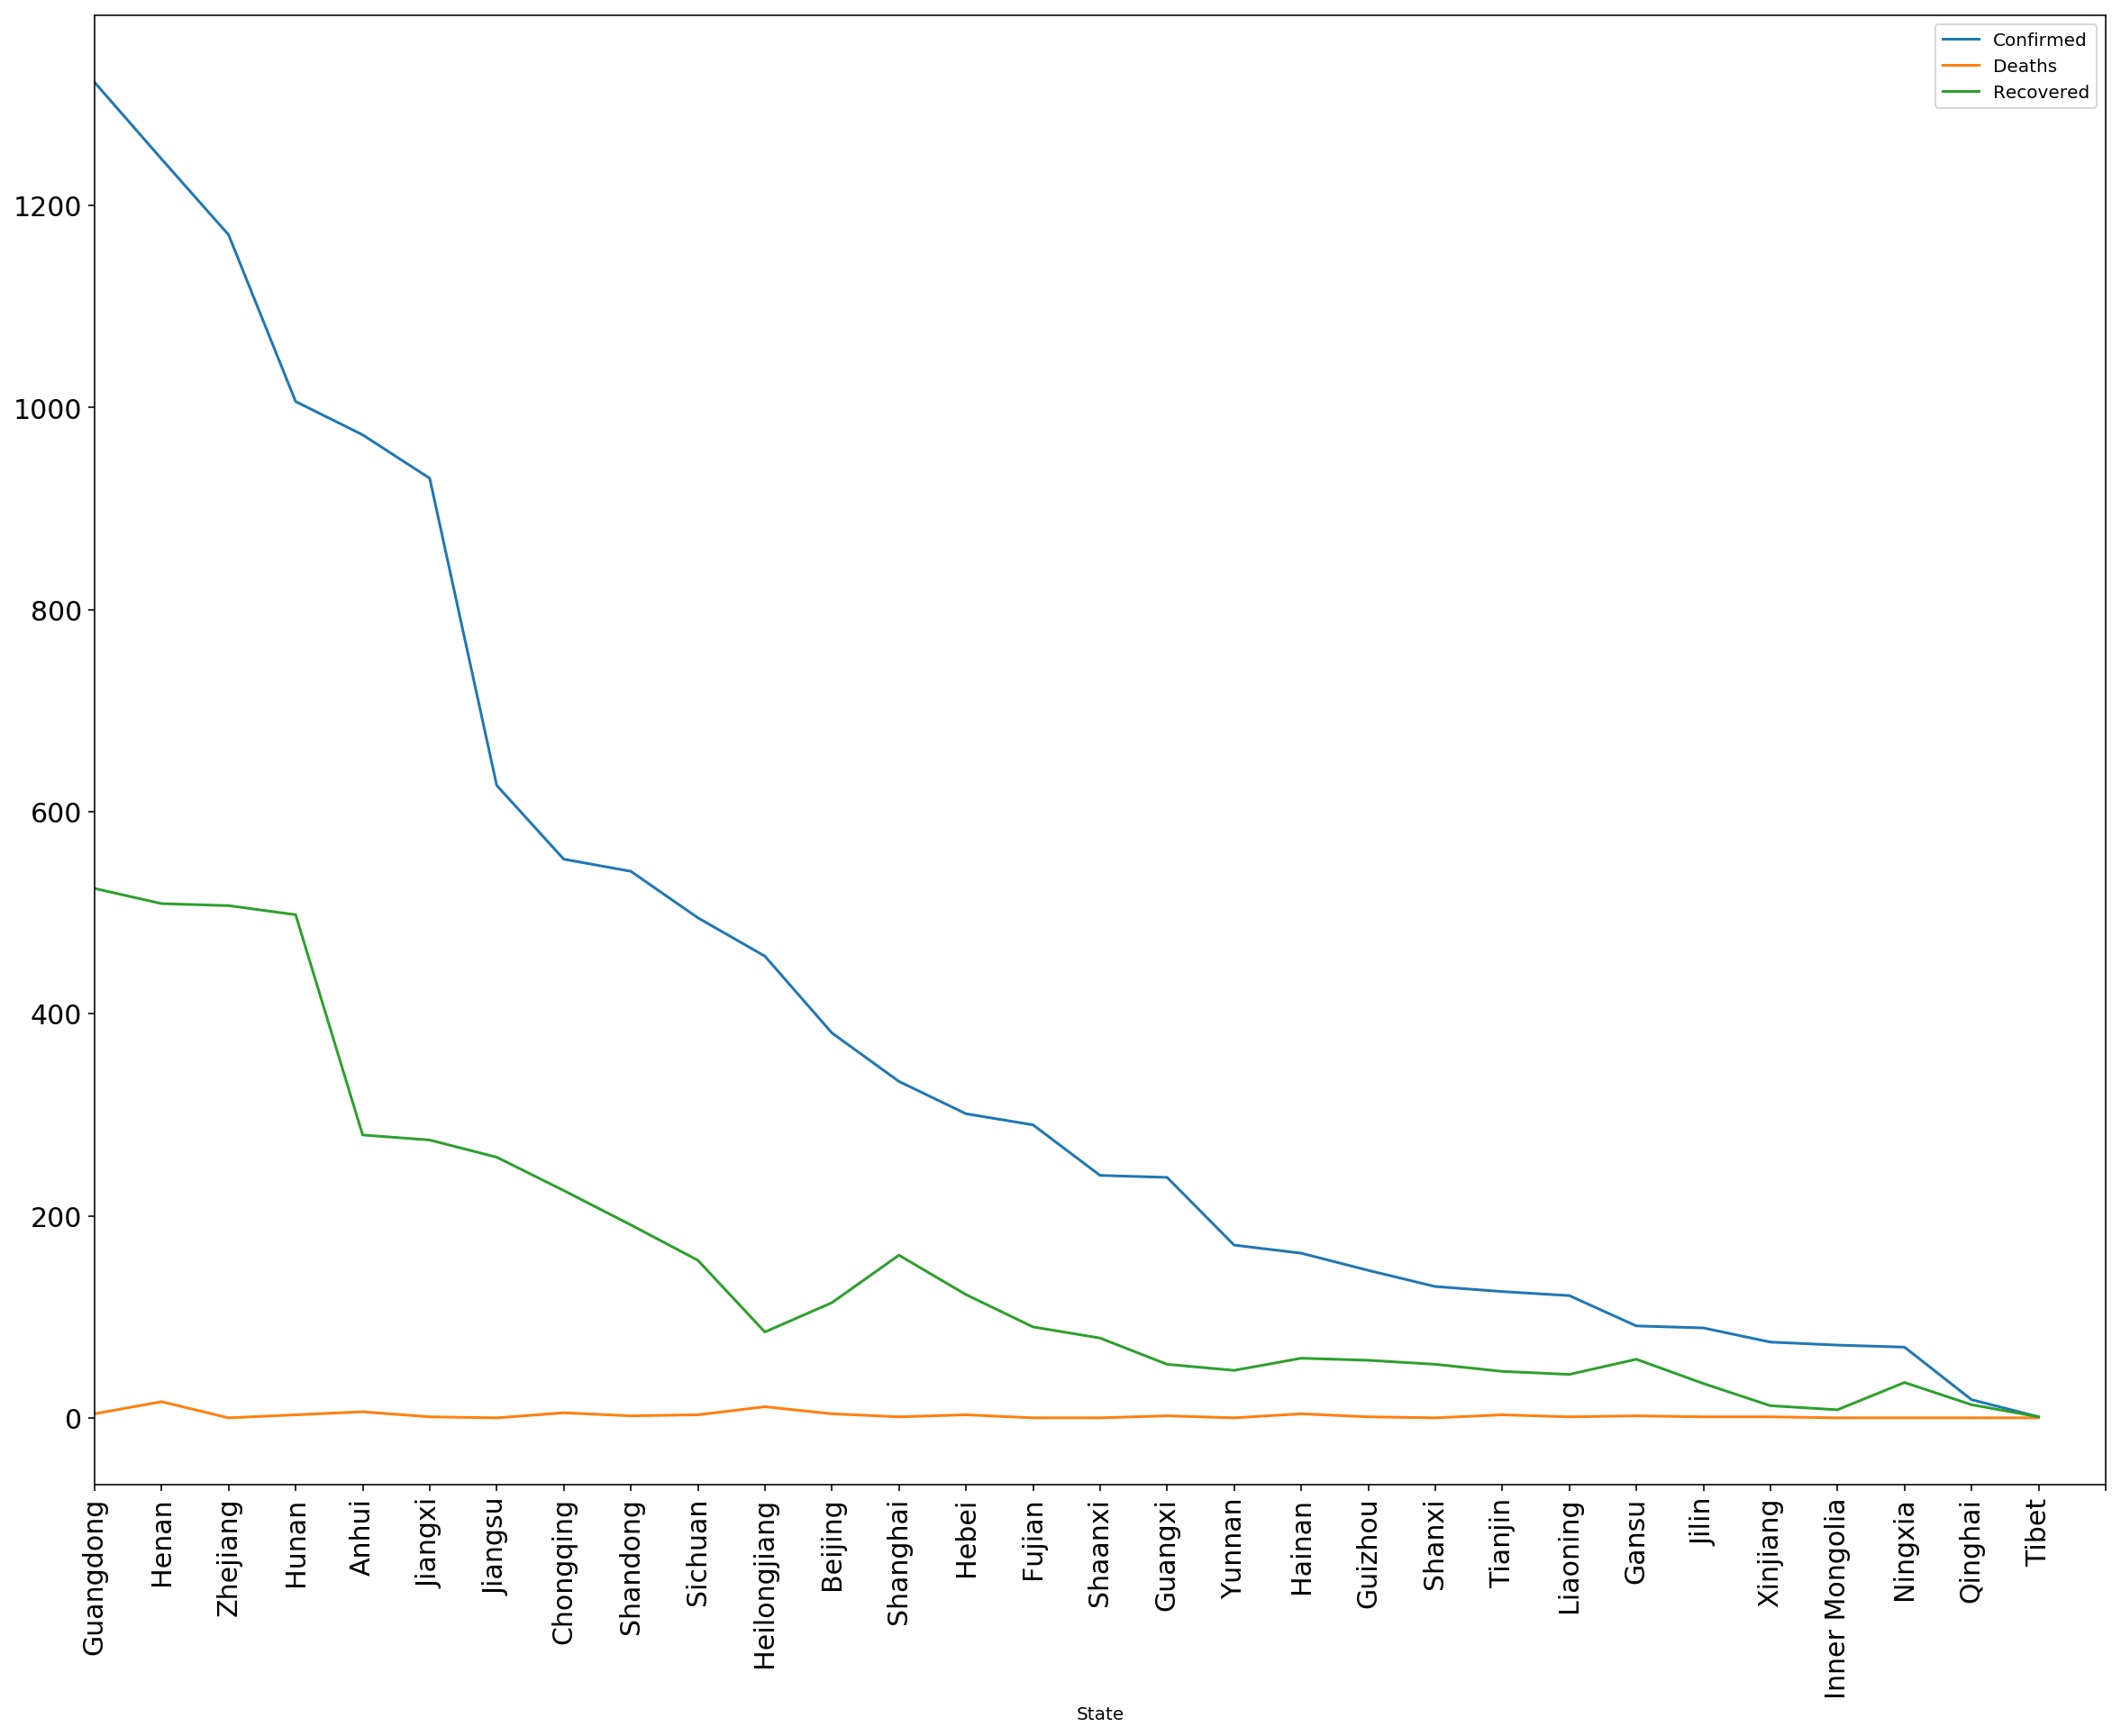

In [30]:
rest_of_China.plot('State',['Confirmed', 'Deaths', 'Recovered'],kind='line',figsize=(20,15), fontsize=15)

tick_labels = rest_of_China['State']
plt.xticks(range(0, len(rest_of_China.State) + 1) , tick_labels, rotation=90) 

In [31]:
formatted_text('***Most number of Confirmed Cases Outside of Hubei***')
print(rest_of_China[rest_of_China['Confirmed'] > 500])

***Most number of Confirmed Cases Outside of Hubei***

       State  Confirmed  Deaths  Recovered
1  Guangdong     1322.0     4.0      524.0
2      Henan     1246.0    16.0      509.0
3   Zhejiang     1171.0     0.0      507.0
4      Hunan     1006.0     3.0      498.0
5      Anhui      973.0     6.0      280.0
6    Jiangxi      930.0     1.0      275.0
7    Jiangsu      626.0     0.0      258.0
8  Chongqing      553.0     5.0      225.0
9   Shandong      541.0     2.0      191.0


## Rest of China (Excluding Hubei) - Spread Over Time

In [32]:
plot = make_subplots(rows=1, cols=3, subplot_titles=("Comfirmed", "Deaths", "Recovered"))

# to plot the spread over time, we would need the data distribution spread over time starting from 22nd Jan 2020
# so we will extract the sub-set from the original data.
chinese_data_over_time = nCoV_data[(nCoV_data['Country'] == 'China') & (nCoV_data['State'] != 'Hubei')]
chinese_data_over_time = chinese_data_over_time.groupby('Date')['Confirmed','Deaths','Recovered'].sum().reset_index()

subPlot1 = go.Scatter(
                x=chinese_data_over_time['Date'],
                y=chinese_data_over_time['Confirmed'],
                name="Confirmed",
                line_color='orange',
                opacity=0.8)

subPlot2 = go.Scatter(
                x=chinese_data_over_time['Date'],
                y=chinese_data_over_time['Deaths'],
                name="Deaths",
                line_color='red',
                opacity=0.8)

subPlot3 = go.Scatter(
                x=chinese_data_over_time['Date'],
                y=chinese_data_over_time['Recovered'],
                name="Recovered",
                line_color='green',
                opacity=0.8)

plot.append_trace(subPlot1, 1, 1)
plot.append_trace(subPlot2, 1, 2)
plot.append_trace(subPlot3, 1, 3)
plot.update_layout(template="ggplot2", title_text = '<b>Spread of the nCov Over Time In Rest of China</b>')

plot.show()

**INFREENCES**

1. There have been many confirmed cases reported outside of Hubei. Zhejiang, Guangdong, Henan, Hunan beng the top four.

2. The recovery from the virus outside of Hubei has not been fast. The virus did not match any other known virus. This 
    raised concern because when a virus is new, we do not know how it affects people. However the number of deaths have 
    very minimal.


**A team of doctors in Thailand have seen some apparent success treating Coronavirus with drug cocktail.
   The doctors combined the anti-flu drug oseltamivir with lopinavir and ritonavir, anti-virals used to treat HIV, 
   Kriengsak said, adding the ministry was awaiting research results to prove the findings.**

**Read more at:**
https://economictimes.indiatimes.com/news/international/world-news/thailand-sees-apparent-success-treating-virus-with-drug-cocktail/articleshow/73879572.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst


## Rest Of World

In [33]:
rest_of_world = CountryWiseData[CountryWiseData['Country'] !='China'][["Country", "Confirmed","Deaths","Recovered"]]

# Reset Index
rest_of_world.reset_index(drop=True, inplace=True)
rest_of_world.index = pd.RangeIndex(start=1, stop=len(CountryWiseData['Country']), step=1)

formatted_text('***Numbers in rest of world for Confirmed, Deaths and Recovered Cases***')

# Data Glimpse
rest_of_world

***Numbers in rest of world for Confirmed, Deaths and Recovered Cases***

,Country,Confirmed,Deaths,Recovered
1,Australia,15.0,0.0,10.0
2,Belgium,1.0,0.0,1.0
3,Cambodia,1.0,0.0,1.0
4,Canada,8.0,0.0,1.0
5,Egypt,1.0,0.0,0.0
6,Finland,1.0,0.0,1.0
7,France,12.0,1.0,4.0
8,Germany,16.0,0.0,1.0
9,Hong Kong,60.0,1.0,2.0
10,India,3.0,0.0,3.0


In [34]:
formatted_text('***Most number of Confirmed Cases Outside of China***')
print(rest_of_world[rest_of_world['Confirmed'] > 20])

***Most number of Confirmed Cases Outside of China***

        Country  Confirmed  Deaths  Recovered
9     Hong Kong       60.0     1.0        2.0
12        Japan       66.0     1.0       12.0
14     Malaysia       22.0     0.0        7.0
16       Others      454.0     0.0        0.0
19    Singapore       77.0     0.0       24.0
20  South Korea       30.0     0.0       10.0
24       Taiwan       22.0     1.0        2.0
25     Thailand       35.0     0.0       15.0


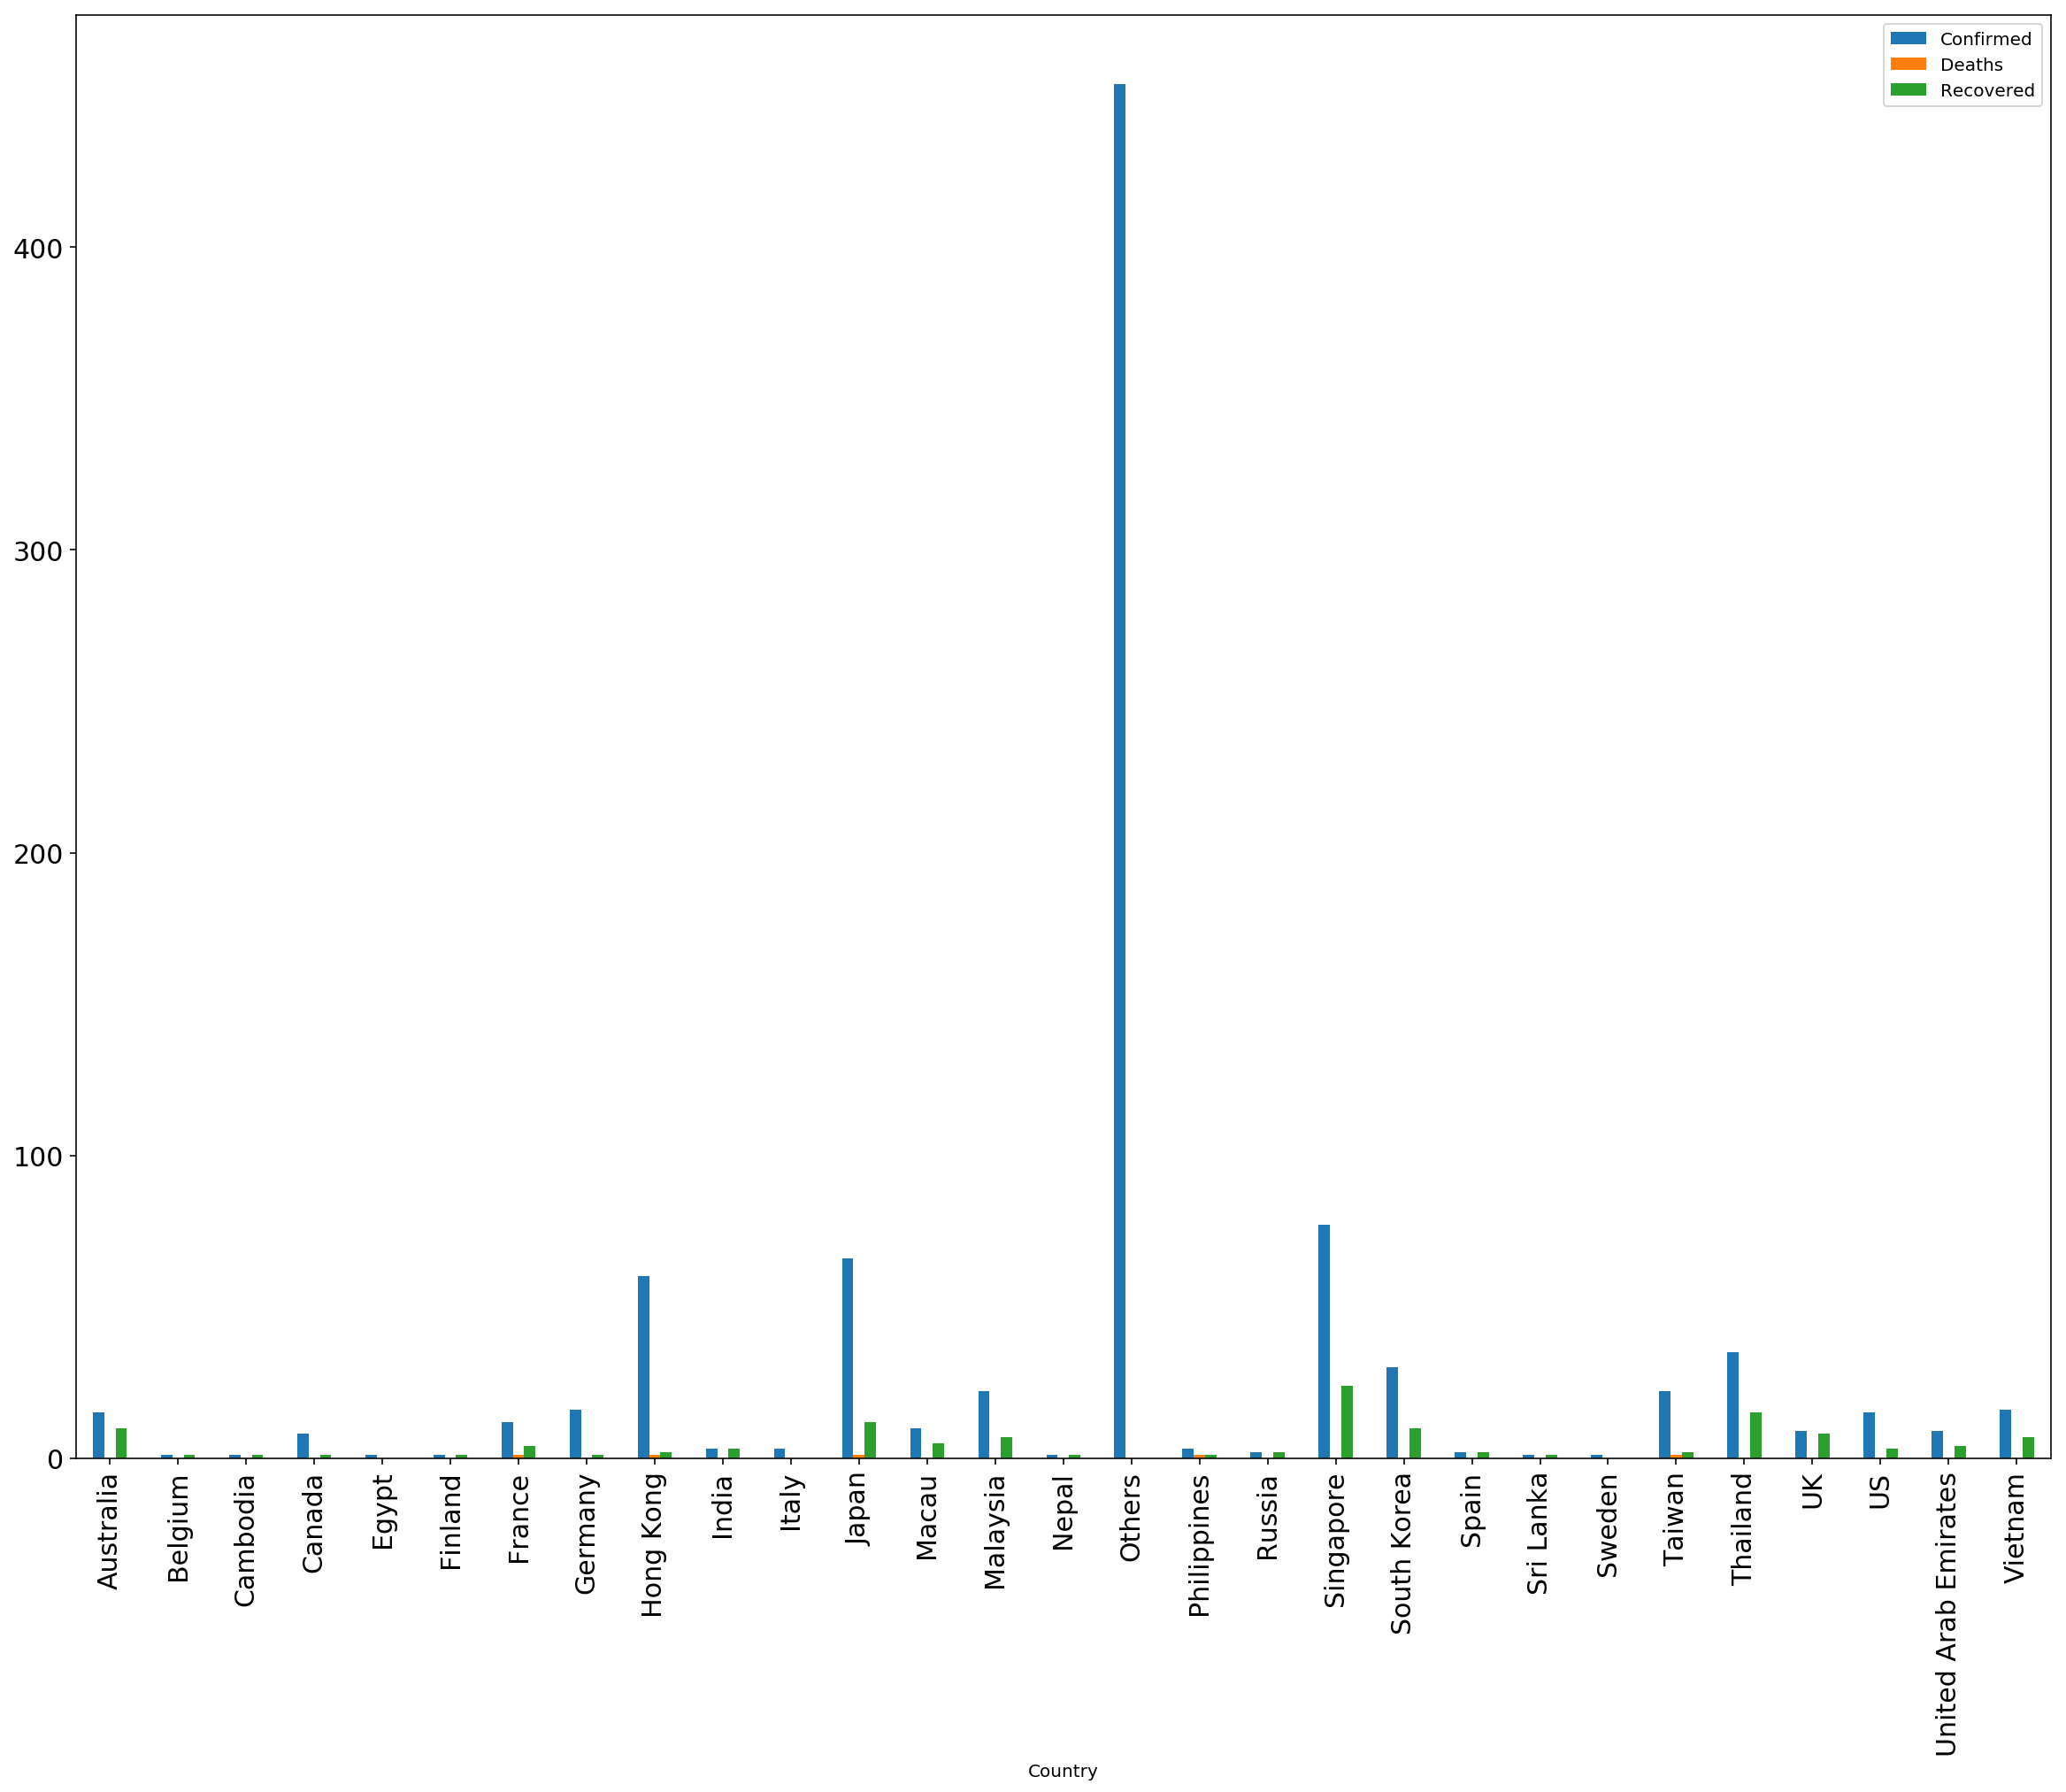

In [35]:
rest_of_world.plot('Country',['Confirmed', 'Deaths', 'Recovered'],kind='bar',figsize=(20,15), fontsize=15)

([<matplotlib.axis.XTick at 0x7f985980da90>,
 <a list of 29 Text xticklabel objects>)

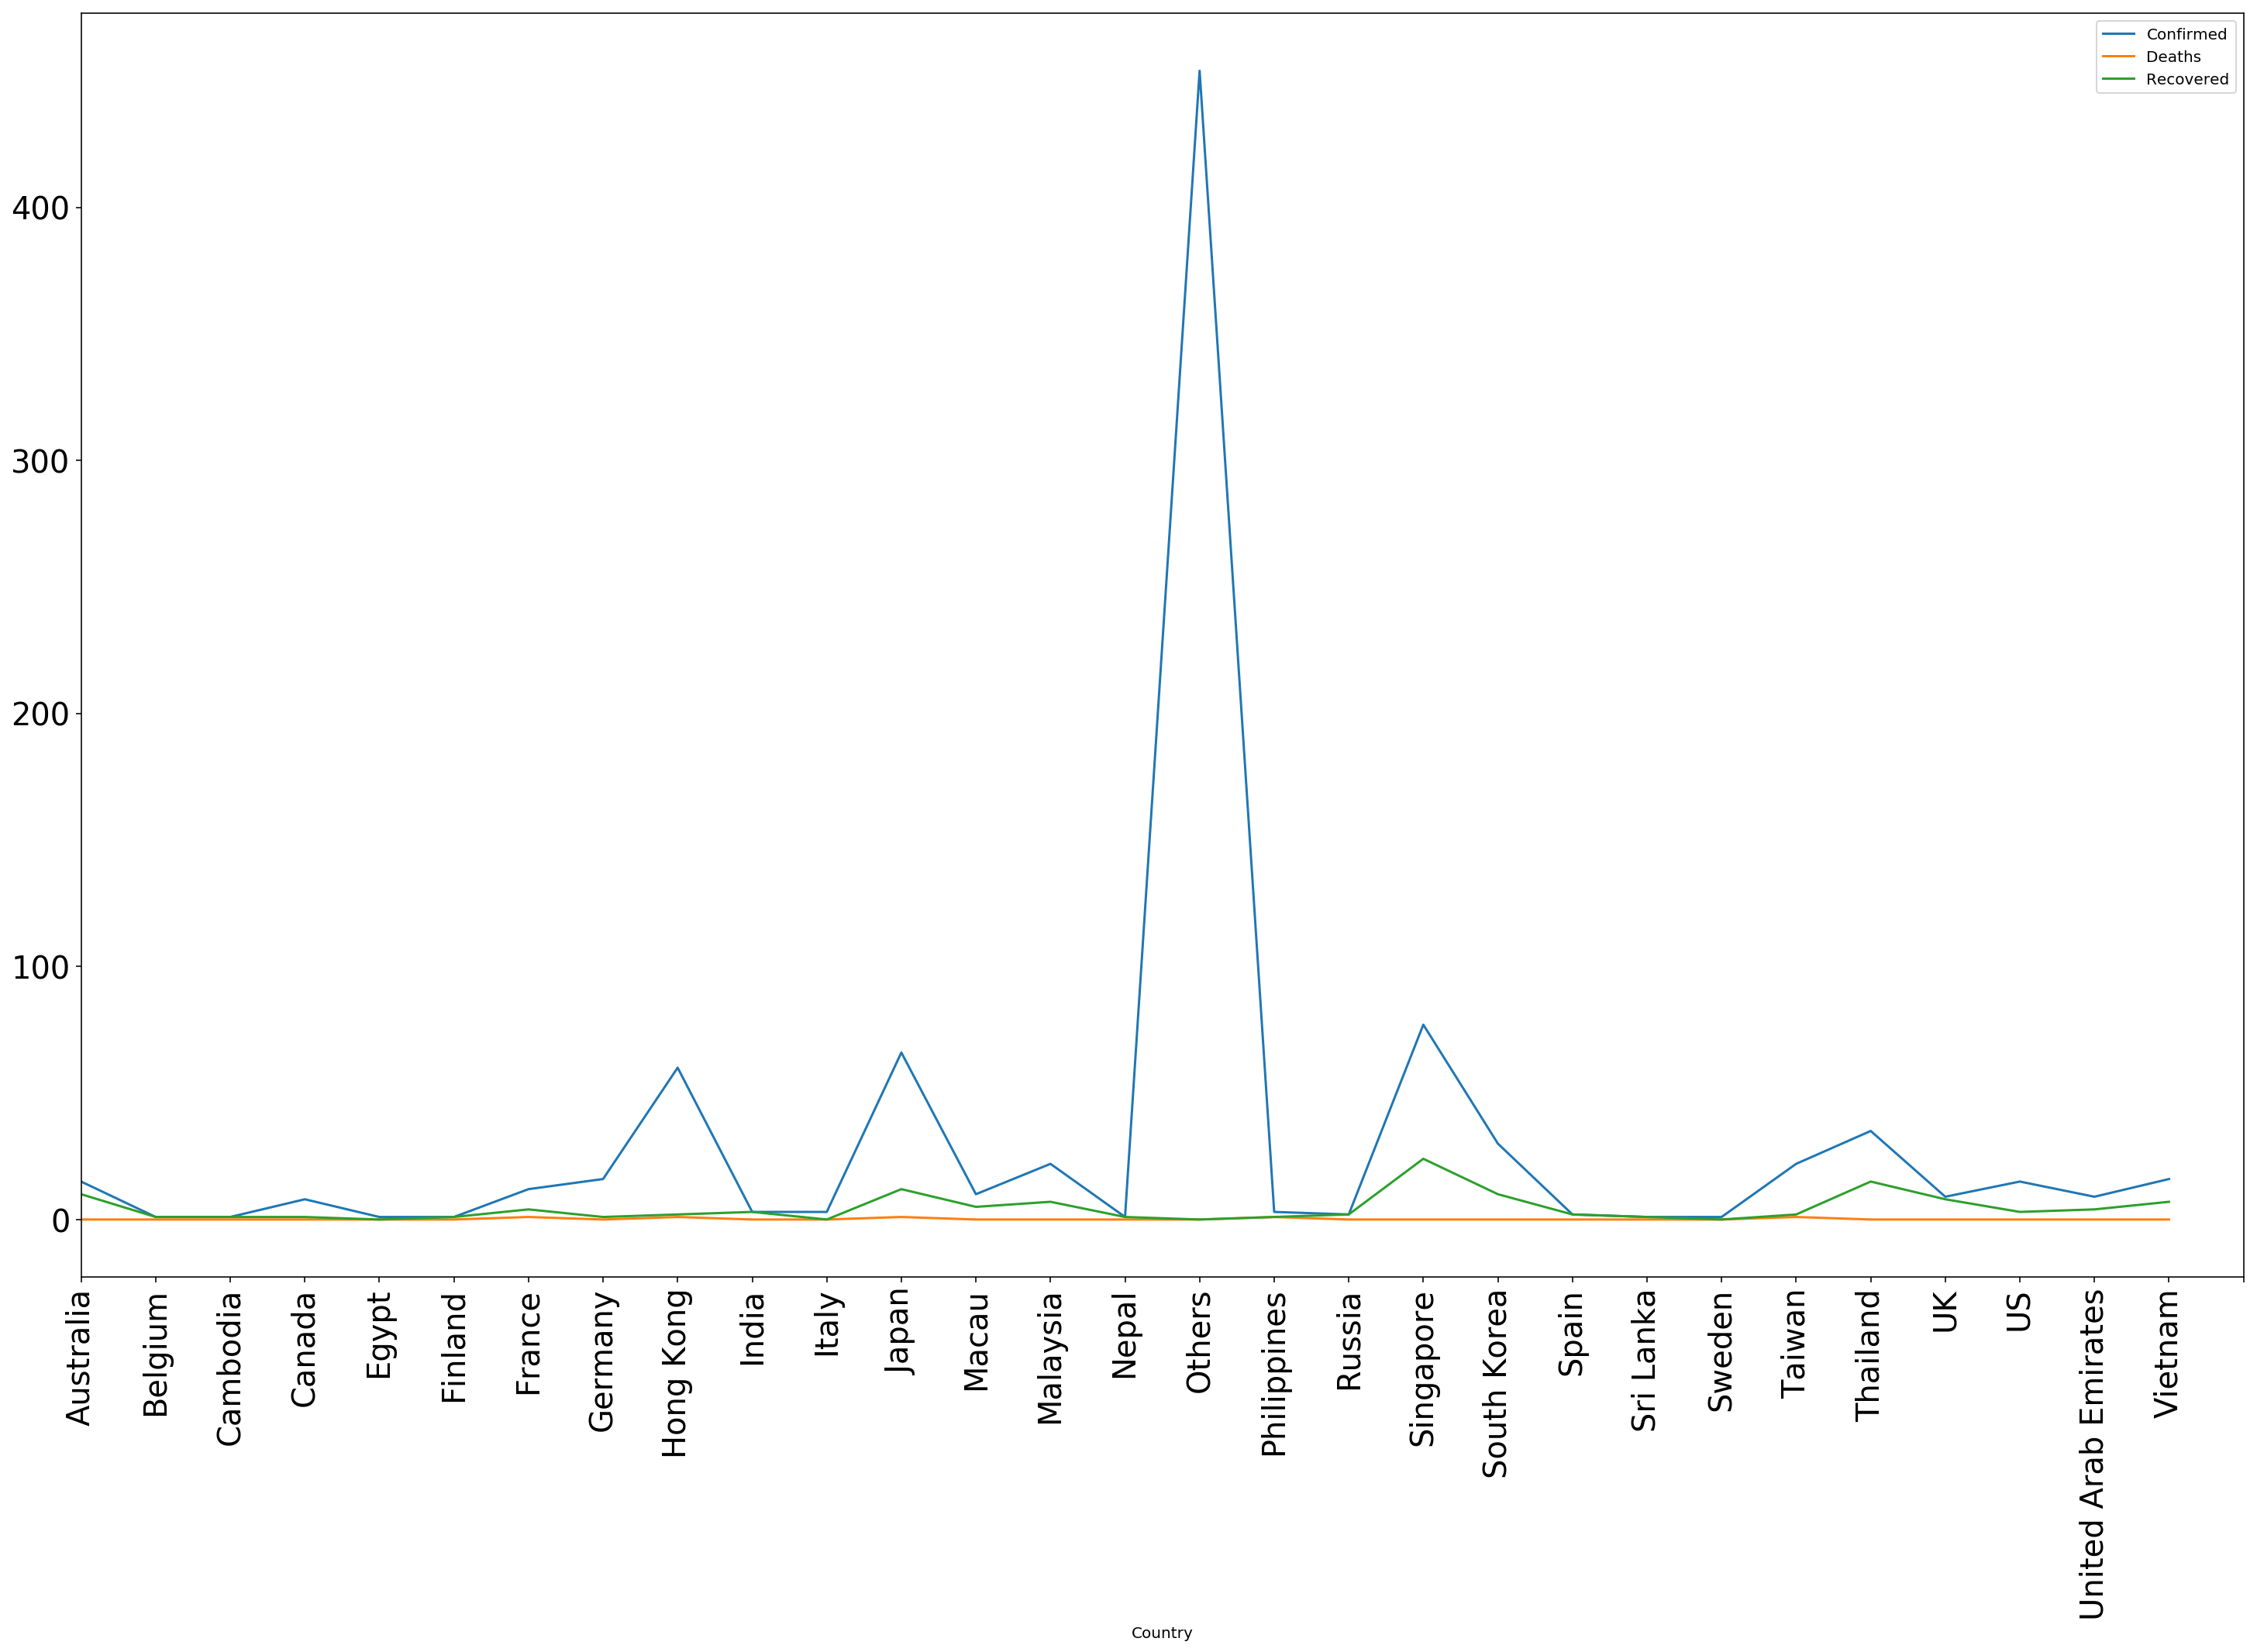

In [36]:
rest_of_world.plot('Country',['Confirmed', 'Deaths', 'Recovered'],figsize=(25,15), fontsize=20)
tick_labels = rest_of_world['Country']
plt.xticks(range(0, len(rest_of_world.Country) + 1) , tick_labels, rotation=90) 

## nCov - Spread over time in Rest of World (Excluding China)

In [37]:
plot = make_subplots(rows=1, cols=3, subplot_titles=("Comfirmed", "Deaths", "Recovered"))

# to plot the spread over time, we would need the data distribution spread over time starting from 22nd Jan 2020
# so we will extract the sub-set from the original data.
rest_of_world_over_time = nCoV_data[(nCoV_data['Country'] != 'China')]
rest_of_world_over_time = rest_of_world_over_time.groupby('Date')['Confirmed','Deaths','Recovered'].sum().reset_index()

subPlot1 = go.Scatter(
                x=rest_of_world_over_time['Date'],
                y=rest_of_world_over_time['Confirmed'],
                name="Confirmed",
                line_color='orange',
                opacity=0.8)

subPlot2 = go.Scatter(
                x=rest_of_world_over_time['Date'],
                y=rest_of_world_over_time['Deaths'],
                name="Deaths",
                line_color='red',
                opacity=0.8)

subPlot3 = go.Scatter(
                x=rest_of_world_over_time['Date'],
                y=rest_of_world_over_time['Recovered'],
                name="Recovered",
                line_color='green',
                opacity=0.8)

plot.append_trace(subPlot1, 1, 1)
plot.append_trace(subPlot2, 1, 2)
plot.append_trace(subPlot3, 1, 3)
plot.update_layout(template="ggplot2", title_text = '<b>Spread of the nCov Over Time In Rest of World</b>')

plot.show()

**INFERENCES**

1. Rest of World has reported cases from 27 different countries outsdie China. Most of the cases have been reported from          Thailand, Singapore and Japan.

2. Honkong, Australia, South Korea have also reported more than 10 cases.

3. India has reported 3 cases so far.

# Geographical Analysis

In [38]:
# Import the WORLD Latitute Longitude Data

world_lat_lon_coordinates = pd.read_csv('../input/world-coordinates/world_coordinates.csv')
world_lat_lon_coordinates.head()

,Code,Country,latitude,longitude
0,AD,Andorra,42.546245,1.601554
1,AE,United Arab Emirates,23.424076,53.847818
2,AF,Afghanistan,33.939110,67.709953
3,AG,Antigua and Barbuda,17.060816,-61.796428
4,AI,Anguilla,18.220554,-63.068615


In [39]:
# Merge the Country co-coordinates above to the country wise data we created.

CountryWiseDataWithLocation = pd.merge(world_lat_lon_coordinates, CountryWiseData, on='Country')
CountryWiseDataWithLocation.head()

,Code,Country,latitude,longitude,Confirmed,Deaths,Recovered
0,AE,United Arab Emirates,23.424076,53.847818,9.0,0.0,4.0
1,AU,Australia,-25.274398,133.775136,15.0,0.0,10.0
2,BE,Belgium,50.503887,4.469936,1.0,0.0,1.0
3,CA,Canada,56.130366,-106.346771,8.0,0.0,1.0
4,CN,China,35.861660,104.195397,72364.0,1863.0,12455.0


In [40]:
WorldMap = folium.Map(location=[0,0], zoom_start=1.5,tiles='cartodbpositron')

for lat, long, confirmed, deaths, recovered, country in zip(CountryWiseDataWithLocation['latitude'],
                                                           CountryWiseDataWithLocation['longitude'],
                                                           CountryWiseDataWithLocation['Confirmed'],
                                                           CountryWiseDataWithLocation['Deaths'],
                                                           CountryWiseDataWithLocation['Recovered'], 
                                                           CountryWiseDataWithLocation['Country']):

    if (deaths == 0):
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                               '<strong>Country:</strong> ' + str(country).capitalize() + '<br>'
                               '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                               '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                               '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='darkblue',icon='info-sign'), color='rgb(55, 83, 109)'
                    , tooltip = str(country).capitalize(), fill_color='rgb(55, 83, 109)').add_to(WorldMap)

    else:
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                               '<strong>Country:</strong> ' + str(country).capitalize() + '<br>'
                               '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                               '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                               '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='red', icon='info-sign'), color='rgb(26, 118, 255)'
                    , tooltip = str(country).capitalize(), fill_color='rgb(26, 118, 255)').add_to(WorldMap)
        
WorldMap

In [41]:
china_confirmed_timeseries = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
china_confirmed_timeseries.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91


In [42]:
# Extract the state latitude and longitude coordinates from the time series data.
china_coordinates = china_confirmed_timeseries[['Province/State','Lat','Long']]
china_coordinates.rename(columns={'Province/State': 'State'}, inplace=True)
china_coordinates.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,Lat,Long
0,Anhui,31.82571,117.2264
1,Beijing,40.18238,116.4142
2,Chongqing,30.05718,107.8740
3,Fujian,26.07783,117.9895
4,Gansu,36.06110,103.8343


In [43]:
ChineseDataWithLocation = pd.merge(china_coordinates, china_latest_data, on='State')
ChineseDataWithLocation.drop_duplicates(subset ="State", 
                     keep = 'first', inplace = True) 

ChineseDataWithLocation.reset_index(drop=True, inplace=True)
ChineseDataWithLocation.index = pd.RangeIndex(start=1, stop=len(ChineseDataWithLocation['State']) + 1, step=1)


In [44]:
ChineseDataWithLocation

,State,Lat,Long,Confirmed,Deaths,Recovered
1,Anhui,31.82571,117.22640,973.0,6.0,280.0
2,Beijing,40.18238,116.41420,381.0,4.0,114.0
3,Chongqing,30.05718,107.87400,553.0,5.0,225.0
4,Fujian,26.07783,117.98950,290.0,0.0,90.0
5,Gansu,36.06110,103.83430,91.0,2.0,58.0
6,Guangdong,23.33841,113.42200,1322.0,4.0,524.0
7,Guangxi,23.82908,108.78810,238.0,2.0,53.0
8,Guizhou,26.81536,106.87480,146.0,1.0,57.0
9,Hainan,19.19673,109.74550,163.0,4.0,59.0
10,Hebei,38.04280,114.51490,301.0,3.0,122.0


In [45]:
china_lat = 35.8617
china_lon = 104.1954

ChinaMap = folium.Map(location=[china_lat, china_lon], zoom_start=4, tiles='cartodbpositron')

for lat, long, confirmed, deaths, recovered, state in zip(ChineseDataWithLocation['Lat'],
                                                           ChineseDataWithLocation['Long'],
                                                           ChineseDataWithLocation['Confirmed'],
                                                           ChineseDataWithLocation['Deaths'],
                                                           ChineseDataWithLocation['Recovered'], 
                                                           ChineseDataWithLocation['State']):
    
    if (deaths == 0):
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                                 '<strong>State:</strong> ' + str(state).capitalize() + '<br>'
                                 '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                                 '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                                 '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='darkblue',icon='info-sign'), color='rgb(55, 83, 109)'
                    , tooltip = str(state).capitalize(), fill_color='rgb(55, 83, 109)').add_to(ChinaMap)
    else:
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                                 '<strong>State:</strong> ' + str(state).capitalize() + '<br>'
                                 '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                                 '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                                 '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='red', icon='info-sign'), color='rgb(26, 118, 255)'
                    , tooltip = str(state).capitalize(), fill_color='rgb(26, 118, 255)').add_to(ChinaMap)
    
    
ChinaMap

**This is just an initial exploratory data analysis for the data available on a day to day basis.**

# Data Insights:

## Covid-19: The new coronavirus disease now officially has a name.
**Read more:** https://www.newscientist.com/article/2233218-covid-19-the-new-coronavirus-disease-now-officially-has-a-name/#ixzz6DpiKd2Ee

1. China is the worst affected where the numbers continue to rise. <br><br>

2. Hubei is the worst affected State in China where the virus is believed to be originated.<br><br>

3. The virus has spread to other countries as well. This could be due to people being present in China/Hubei as the time of 
   the outbreak and in the event of their return to home country unknowingly carried the virus along.<br><br>
   
4. There have been many confirmed cases reported outside of Hubei. Zhejiang, Guangdong, Henan, Hunan beng the top four.<br><br>

5. The recovery from the virus outside of Hubei has not been fast. The virus did not match any other known virus. 
   This raised  concern because when a virus is new, we do not know how it affects people. There were no existing 
   medications  available. 
   However, A team of doctors in Thailand have seen some apparent success treating Coronavirus with drug cocktail. The 
   doctors combined the anti-flu drug oseltamivir with lopinavir and ritonavir, anti-virals used to treat HIV, Kriengsak 
   said, adding the ministry was awaiting research results to prove the findings.<br>

   Read more at: https://economictimes.indiatimes.com/news/international/world-news/thailand-sees-apparent-success-treating-virus-with-drug-cocktail/articleshow/73879572.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst


6. Rest of World has reported cases from 27 different countries outsdie China. Most of the cases have been reported from Thailand, Singapore and Japan.<br><br>

7. Honkong, Australia, South Korea have also reported more than 10 cases.<br><br>

8. India has reported 3 cases so far.



#### However I wish this dataset never existed in reality.